In [1]:
import pandas as pd
import numpy as np
import re
import datetime
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

# Cases in U.S.

### Extract Files 

In [2]:
confirmed = pd.read_csv('files/time_series_covid19_confirmed_US.csv')
death = pd.read_csv('files/time_series_covid19_deaths_US.csv')

In [3]:
confirmed

UID iso2 iso3  code3  FIPS          Admin2  \
0           16   AS  ASM     16  60.0             NaN   
1          316   GU  GUM    316  66.0             NaN   
2          580   MP  MNP    580  69.0             NaN   
3          630   PR  PRI    630  72.0             NaN   
4          850   VI  VIR    850  78.0             NaN   
...        ...  ...  ...    ...   ...             ...   
3256  84070016   US  USA    840   NaN    Central Utah   
3257  84070017   US  USA    840   NaN  Southeast Utah   
3258  84070018   US  USA    840   NaN  Southwest Utah   
3259  84070019   US  USA    840   NaN       TriCounty   
3260  84070020   US  USA    840   NaN    Weber-Morgan   

                Province_State Country_Region        Lat       Long_  ...  \
0               American Samoa             US -14.271000 -170.132000  ...   
1                         Guam             US  13.444300  144.793700  ...   
2     Northern Mariana Islands             US  15.097900  145.673900  ...   
3                  Puerto Rico             US  18.220800  -66.590100  ...   
4               Virgin Islands             US  18.335800  -64.896300  ...   
...                        ...            ...        ...         ...  ...   
3256                      Utah             US  39.372319 -111.575868  ...   
3257                      Utah             US  38.996171 -110.701396  ...   
3258                      Utah             US  37.854472 -111.441876  ...   
3259                      Utah             US  40.124915 -109.517442  ...   
3260                      Utah             US  41.271160 -111.914512  ...   

     6/28/20  6/29/20  6/30/20  7/1/20  7/2/20  7/3/20  7/4/20  7/5/20  \
0          0        0        0       0       0       0       0       0   
1        247      253      257     267     280     280     280     280   
2         30       30       30      30      31      31      31      31   
3       7189     7250     7465    7537    7608    7683    7787    7916   
4         81       81       81      90      92      98     111     111   
...      ...      ...      ...     ...     ...     ...     ...     ...   
3256     143      159      169     173     180     194     201     209   
3257      35       35       36      37      39      40      40      40   
3258    1428     1467     1519    1553    1584    1625    1660    1689   
3259      48       48       50      50      52      53      55      55   
3260     872      919      954    1004    1042    1090    1172    1195   

      7/6/20  7/7/20  
0          0       0  
1        301     303  
2         31      31  
3       8585    8714  
4        112     116  
...      ...     ...  
3256     217     227  
3257      41      41  
3258    1731    1805  
3259      56      56  
3260    1255    1293  

[3261 rows x 179 columns]

### Data Wrangling

In [4]:
dates = [x for x in list(confirmed.columns) if re.search('/',x)]

In [5]:
confirmed_clean = confirmed.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Cases'})
confirmed_clean['Date'] = pd.to_datetime(confirmed_clean['Date'], errors ='coerce')
confirmed_clean.set_index('Date',inplace = True)
confirmed_clean

County            Province_State Country_Region  \
Date                                                                  
2020-01-22             NaN            American Samoa             US   
2020-01-22             NaN                      Guam             US   
2020-01-22             NaN  Northern Mariana Islands             US   
2020-01-22             NaN               Puerto Rico             US   
2020-01-22             NaN            Virgin Islands             US   
...                    ...                       ...            ...   
2020-07-07    Central Utah                      Utah             US   
2020-07-07  Southeast Utah                      Utah             US   
2020-07-07  Southwest Utah                      Utah             US   
2020-07-07       TriCounty                      Utah             US   
2020-07-07    Weber-Morgan                      Utah             US   

                  Lat       Long_                  Combined_Key  Total Cases  
Date                                                                          
2020-01-22 -14.271000 -170.132000            American Samoa, US            0  
2020-01-22  13.444300  144.793700                      Guam, US            0  
2020-01-22  15.097900  145.673900  Northern Mariana Islands, US            0  
2020-01-22  18.220800  -66.590100               Puerto Rico, US            0  
2020-01-22  18.335800  -64.896300            Virgin Islands, US            0  
...               ...         ...                           ...          ...  
2020-07-07  39.372319 -111.575868        Central Utah, Utah, US          227  
2020-07-07  38.996171 -110.701396      Southeast Utah, Utah, US           41  
2020-07-07  37.854472 -111.441876      Southwest Utah, Utah, US         1805  
2020-07-07  40.124915 -109.517442           TriCounty, Utah, US           56  
2020-07-07  41.271160 -111.914512        Weber-Morgan, Utah, US         1293  

[547848 rows x 7 columns]

In [6]:
death_clean = death.melt(id_vars=['Admin2','Province_State','Country_Region','Lat','Long_','Combined_Key'], value_vars= dates).rename(columns={'Admin2':'County','variable':'Date','value':'Total Death'})
death_clean['Date'] = pd.to_datetime(death_clean['Date'])
death_clean.set_index('Date',inplace = True)
death_clean

County            Province_State Country_Region  \
Date                                                                  
2020-01-22             NaN            American Samoa             US   
2020-01-22             NaN                      Guam             US   
2020-01-22             NaN  Northern Mariana Islands             US   
2020-01-22             NaN               Puerto Rico             US   
2020-01-22             NaN            Virgin Islands             US   
...                    ...                       ...            ...   
2020-07-07    Central Utah                      Utah             US   
2020-07-07  Southeast Utah                      Utah             US   
2020-07-07  Southwest Utah                      Utah             US   
2020-07-07       TriCounty                      Utah             US   
2020-07-07    Weber-Morgan                      Utah             US   

                  Lat       Long_                  Combined_Key  Total Death  
Date                                                                          
2020-01-22 -14.271000 -170.132000            American Samoa, US            0  
2020-01-22  13.444300  144.793700                      Guam, US            0  
2020-01-22  15.097900  145.673900  Northern Mariana Islands, US            0  
2020-01-22  18.220800  -66.590100               Puerto Rico, US            0  
2020-01-22  18.335800  -64.896300            Virgin Islands, US            0  
...               ...         ...                           ...          ...  
2020-07-07  39.372319 -111.575868        Central Utah, Utah, US            0  
2020-07-07  38.996171 -110.701396      Southeast Utah, Utah, US            0  
2020-07-07  37.854472 -111.441876      Southwest Utah, Utah, US           13  
2020-07-07  40.124915 -109.517442           TriCounty, Utah, US            0  
2020-07-07  41.271160 -111.914512        Weber-Morgan, Utah, US           14  

[547848 rows x 7 columns]

In [7]:
states = list(confirmed_clean['Province_State'].unique())

### Trends of Daily New Cases and Death for Each State

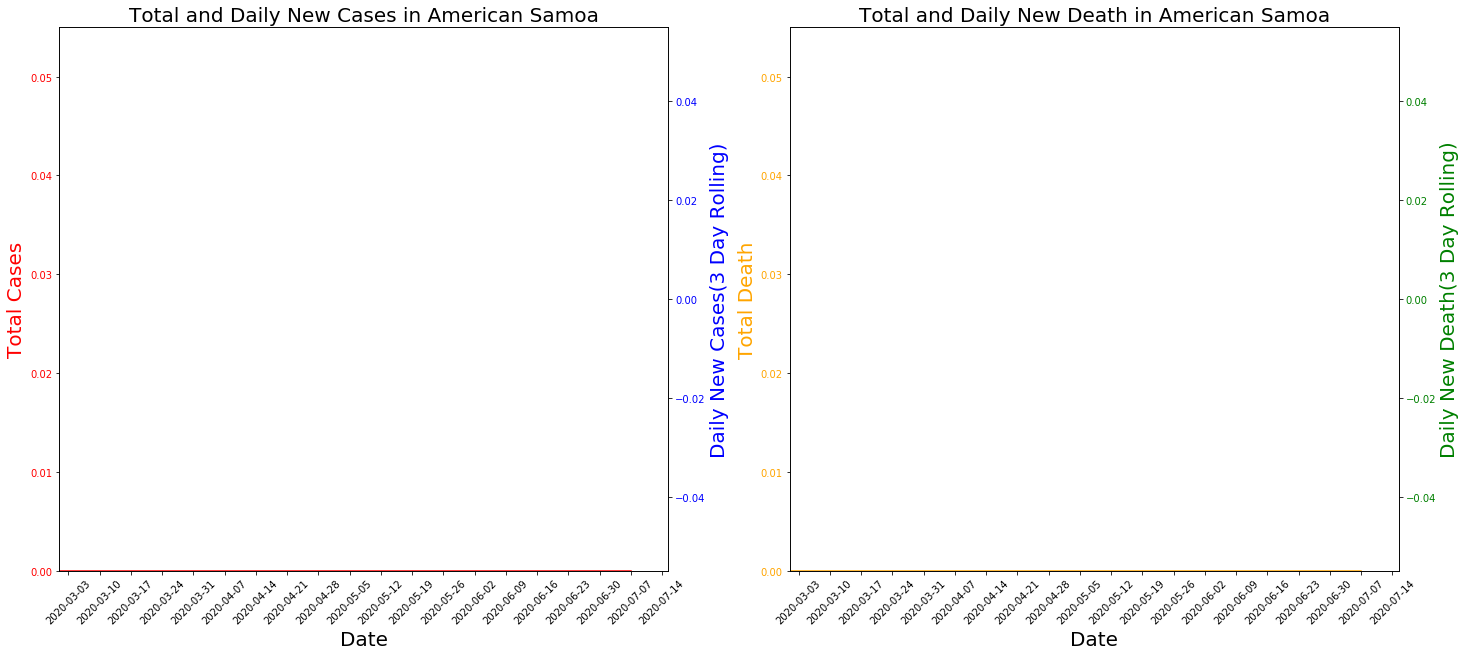

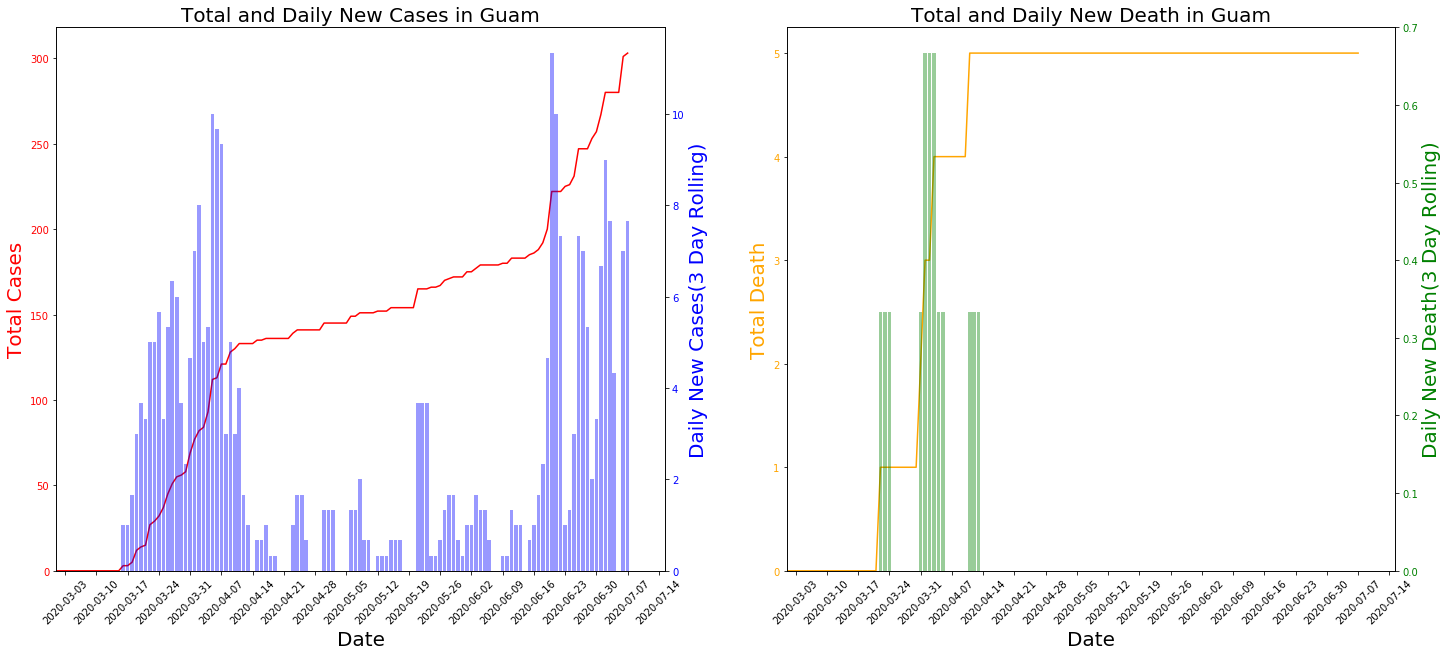

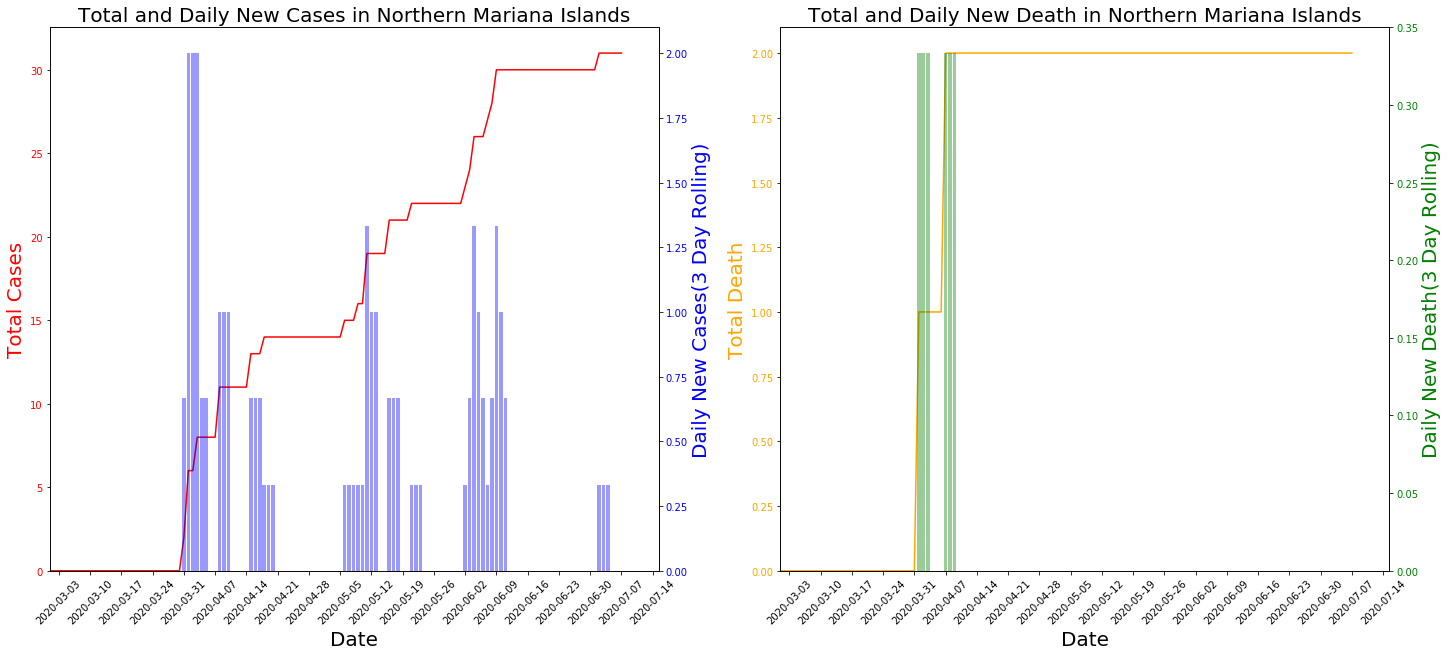

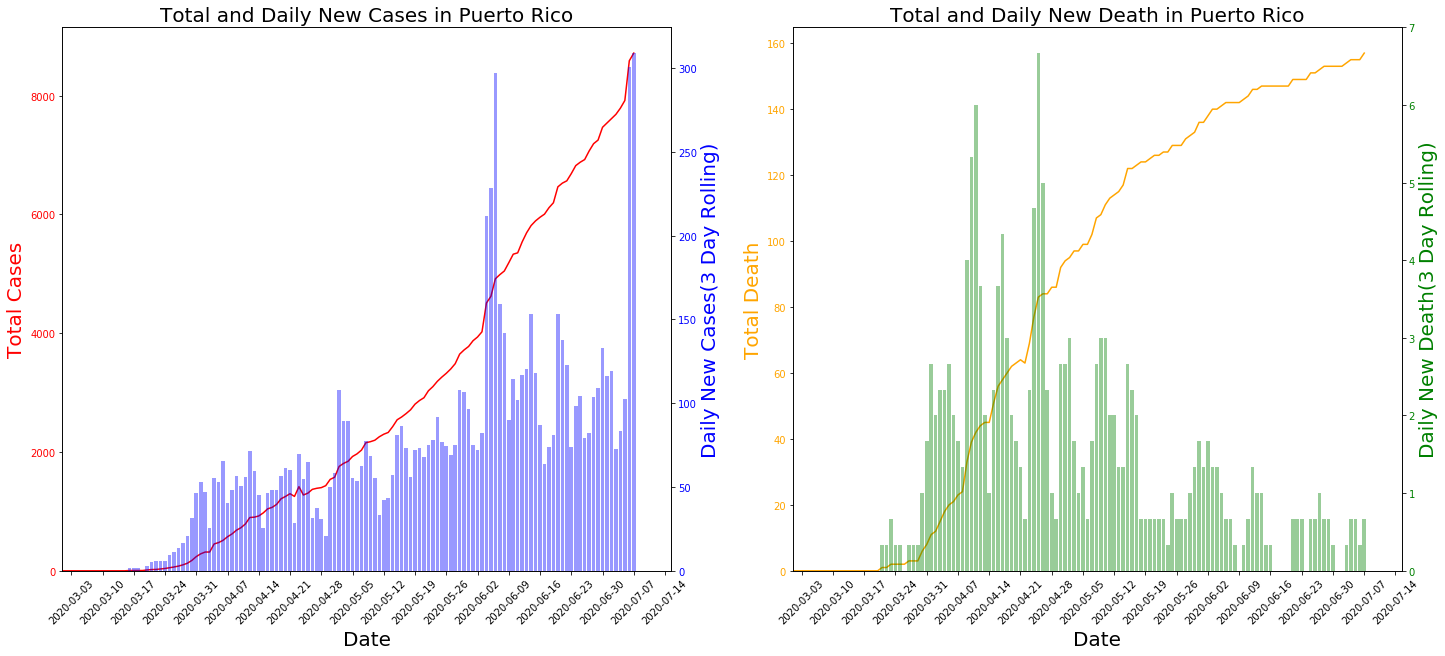

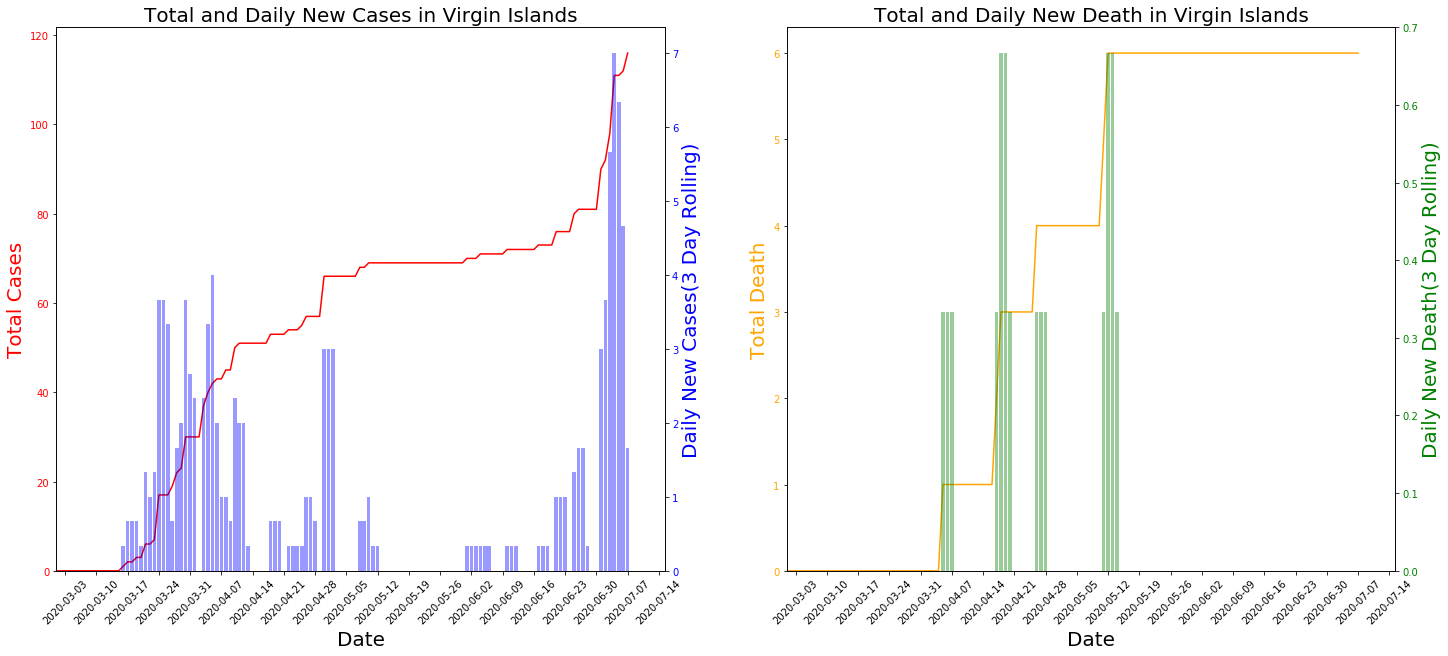

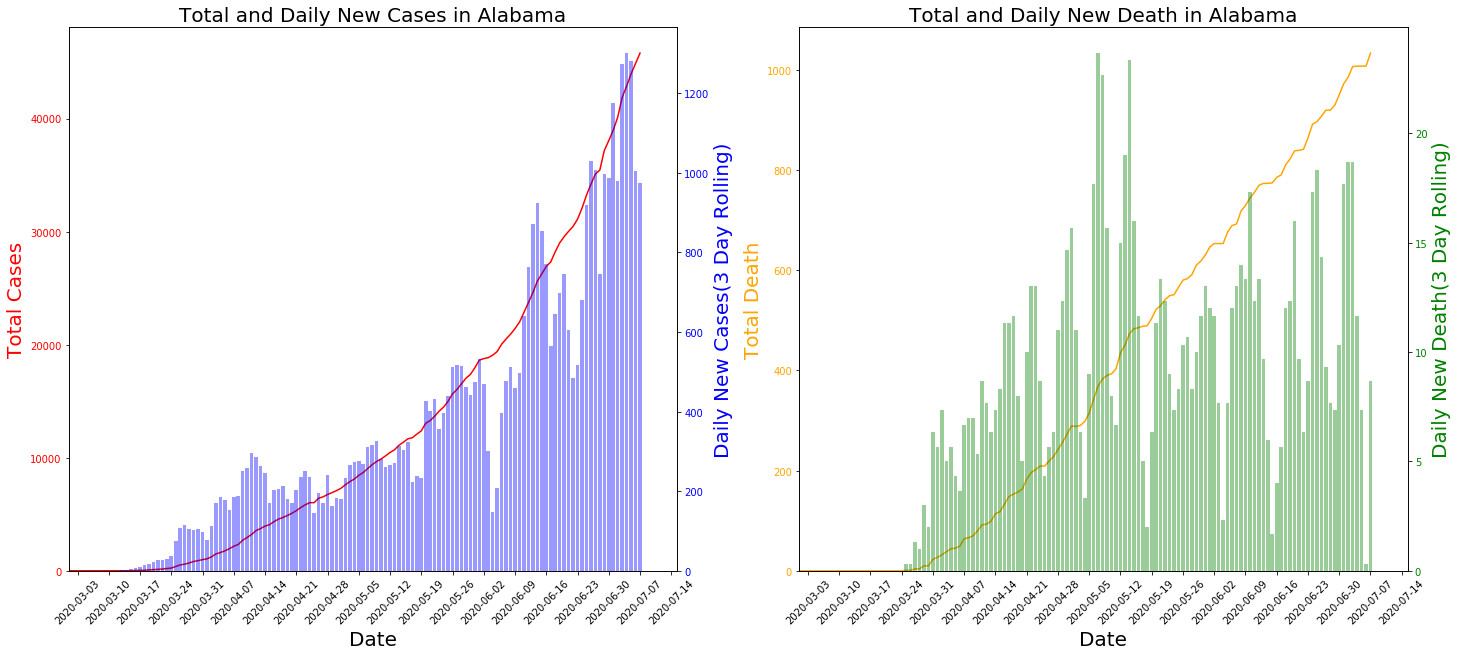

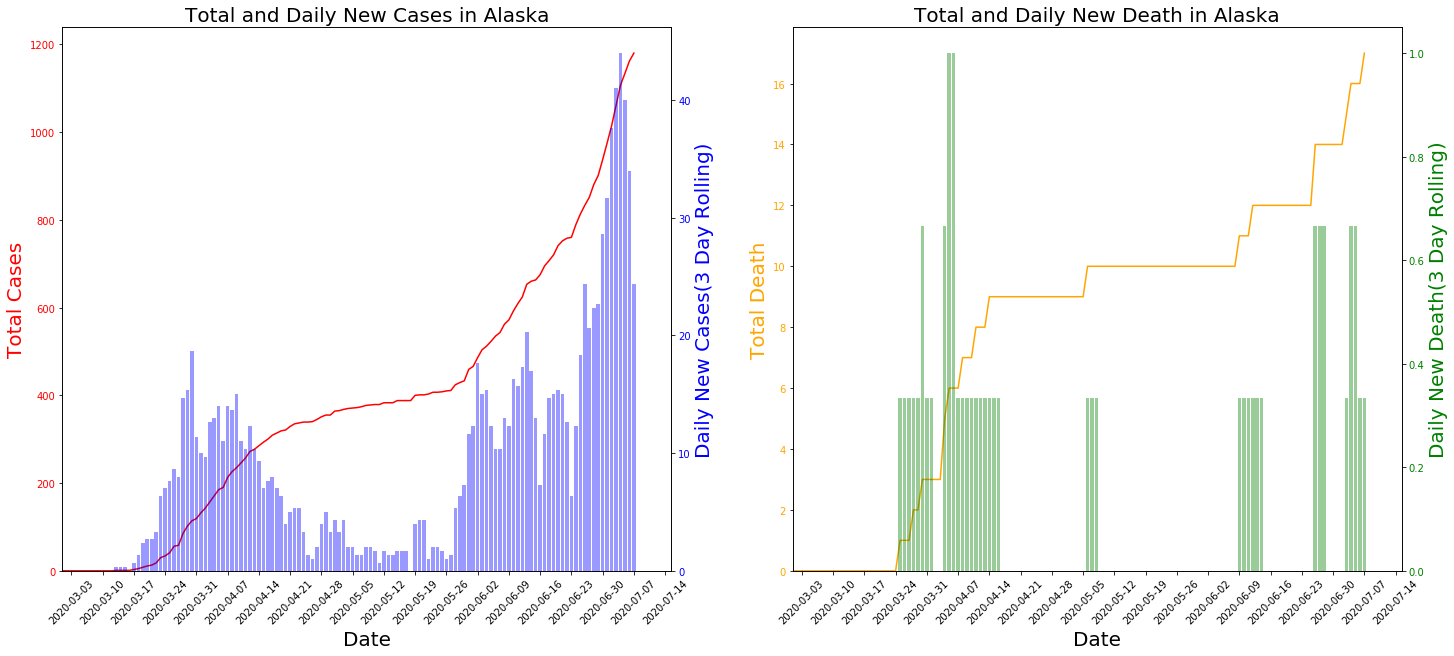

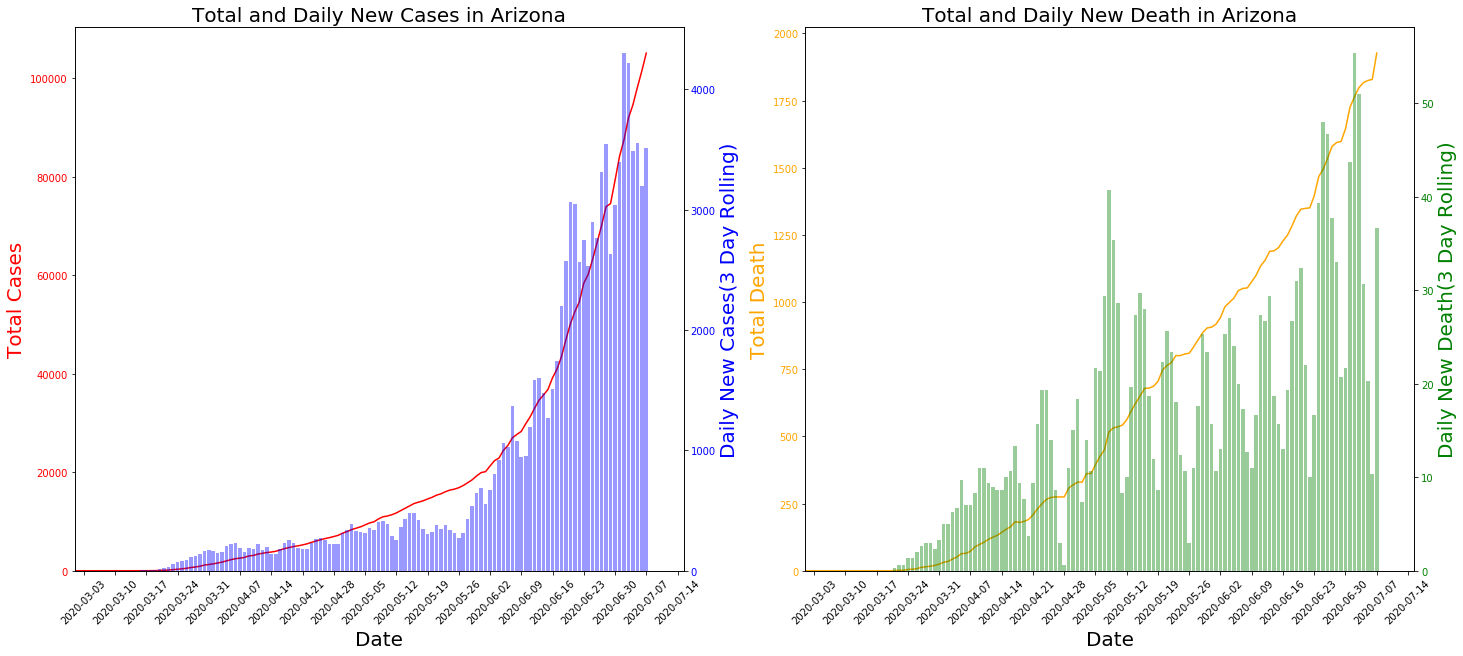

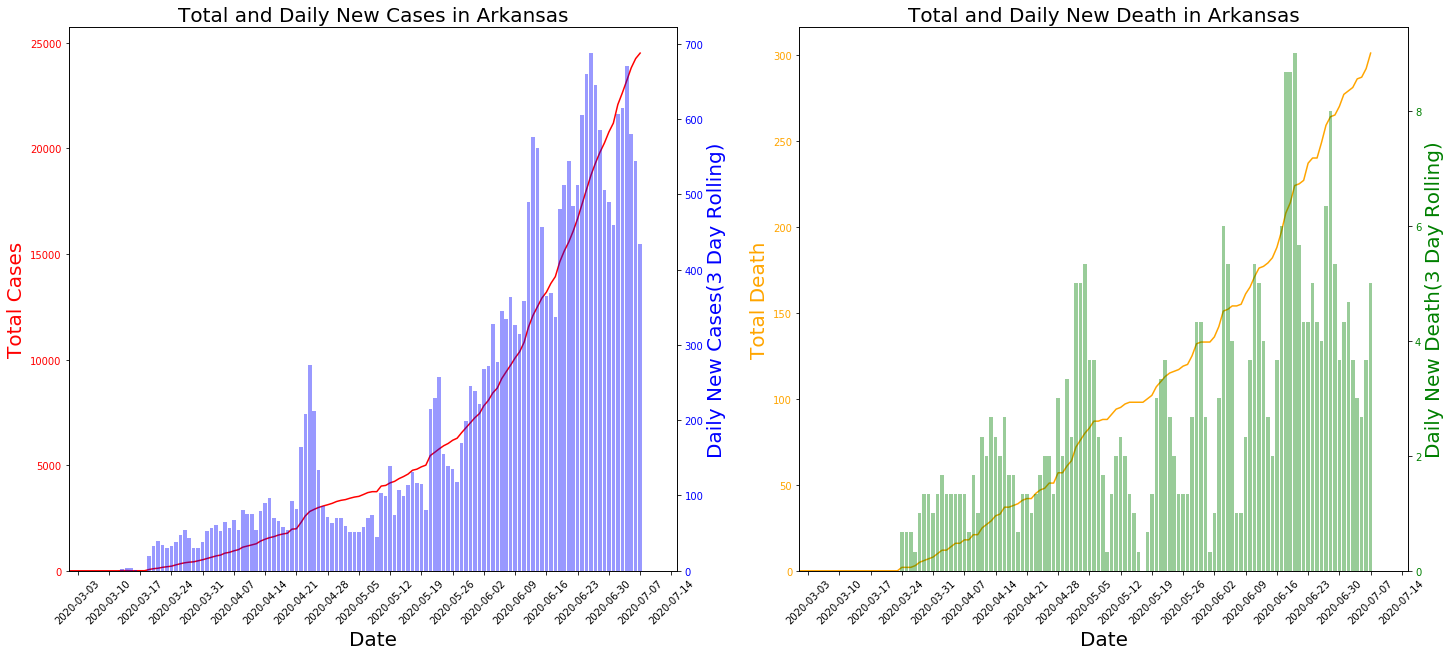

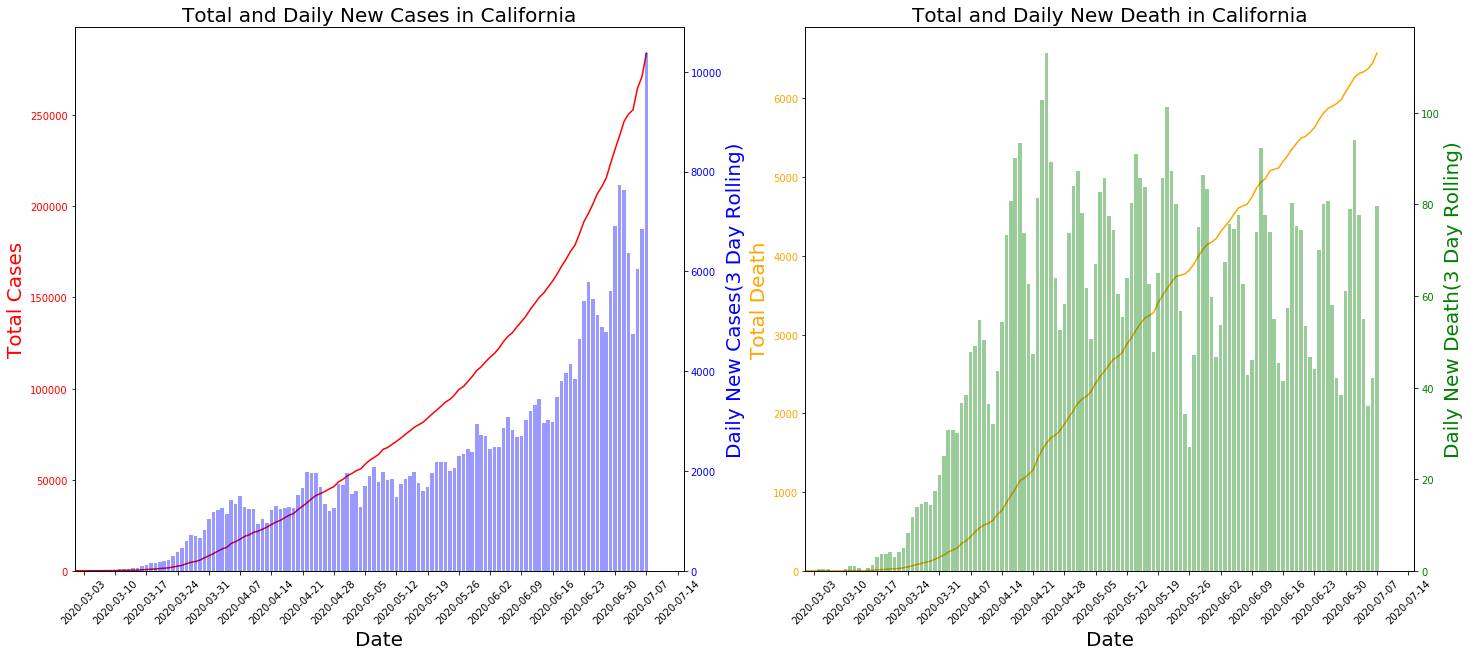

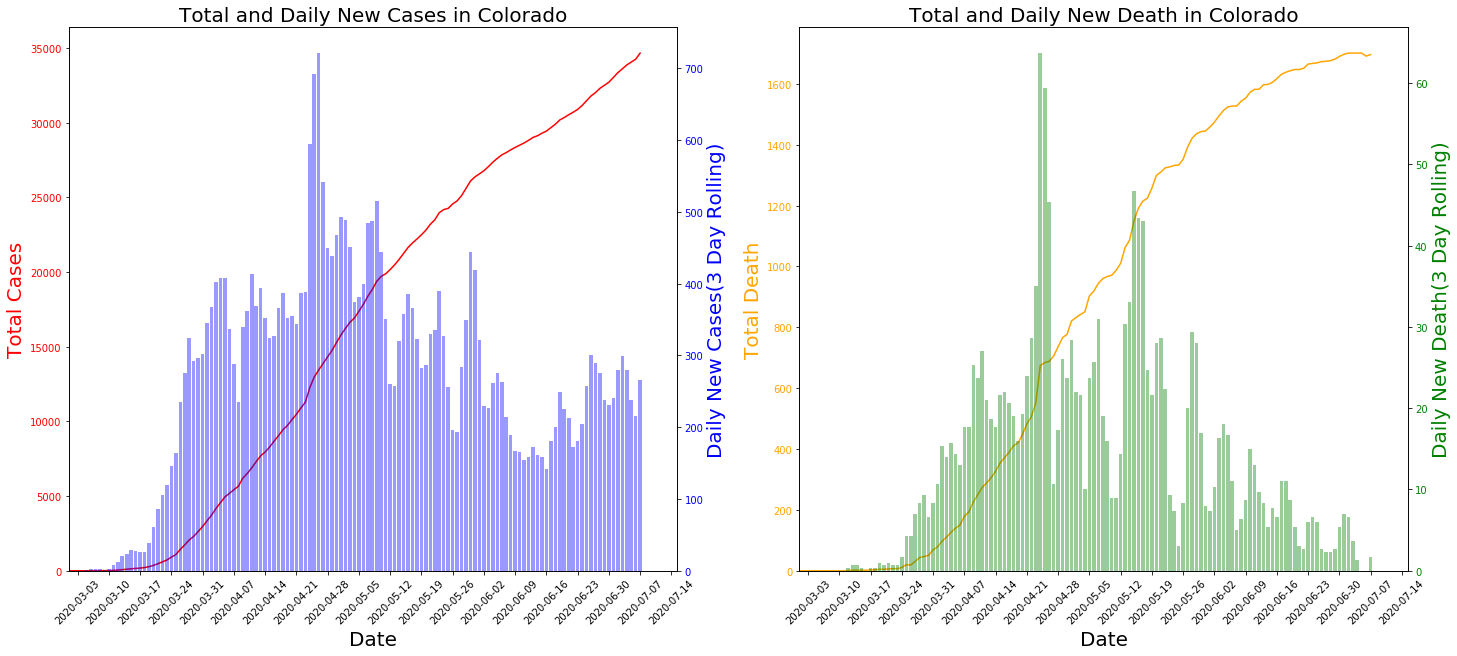

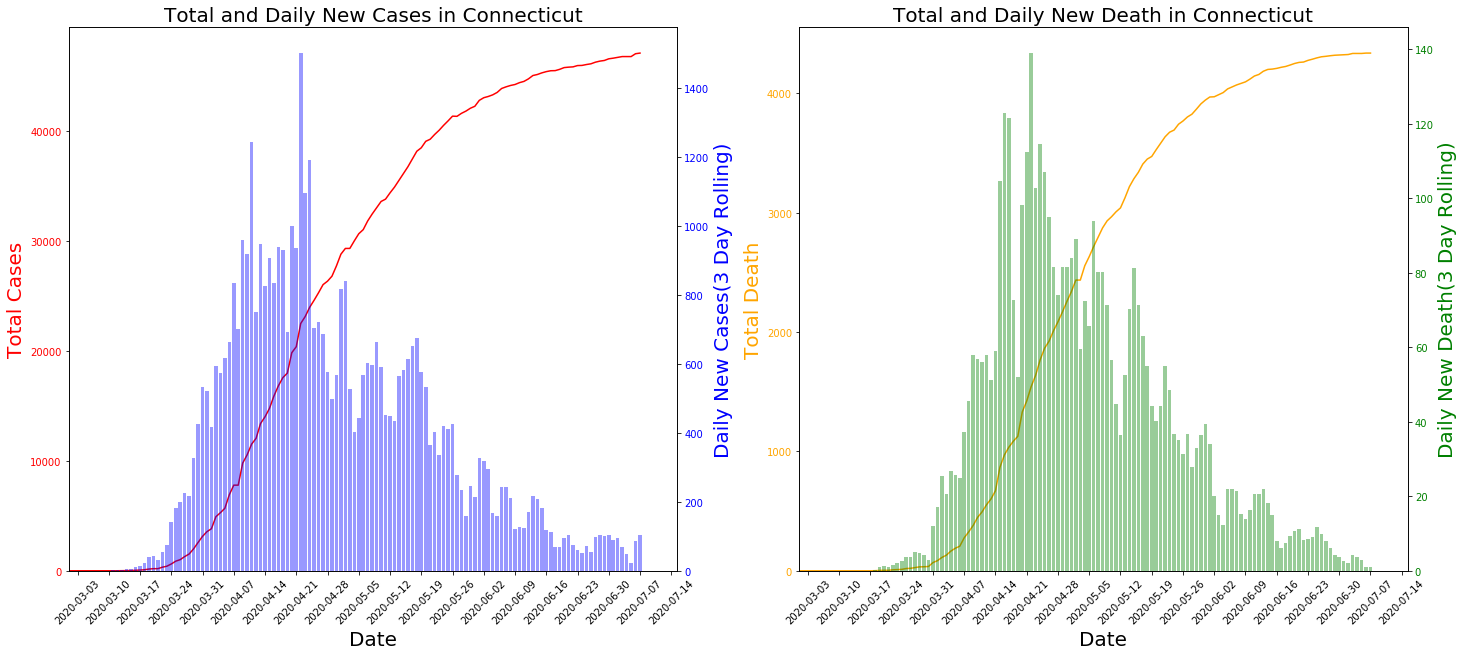

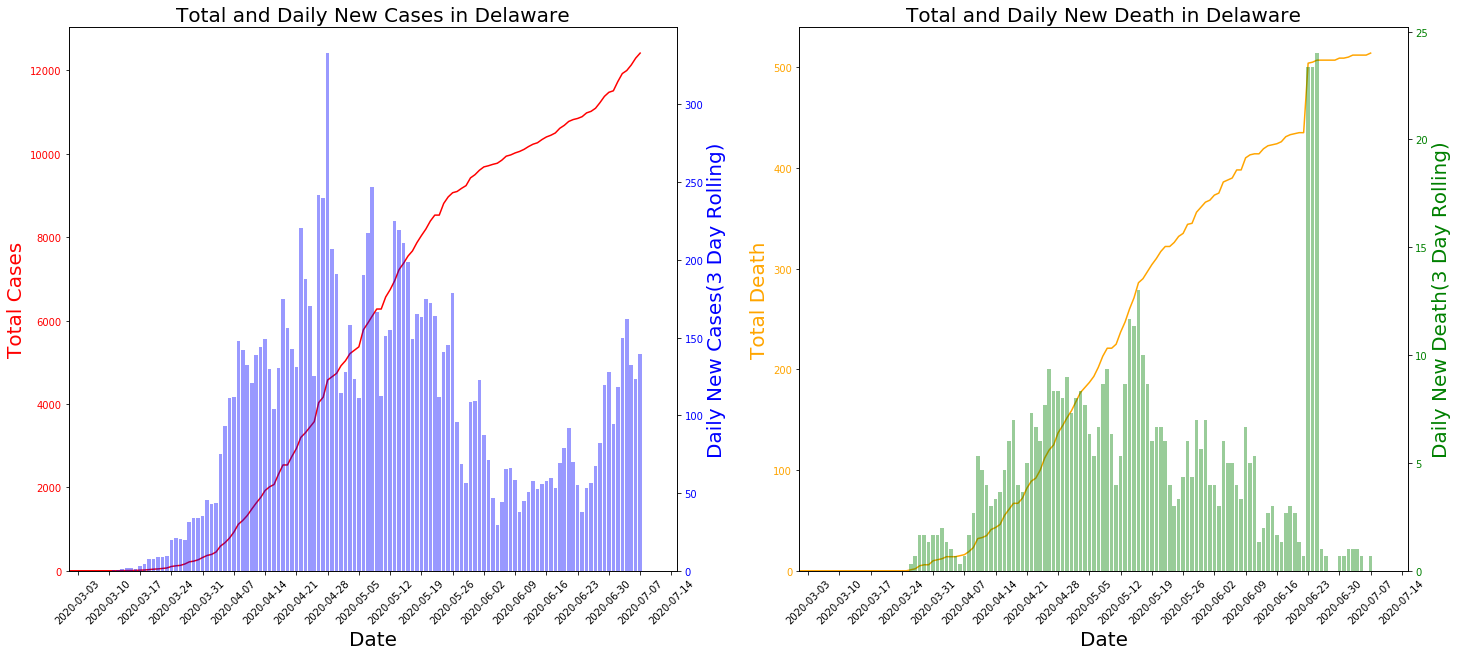

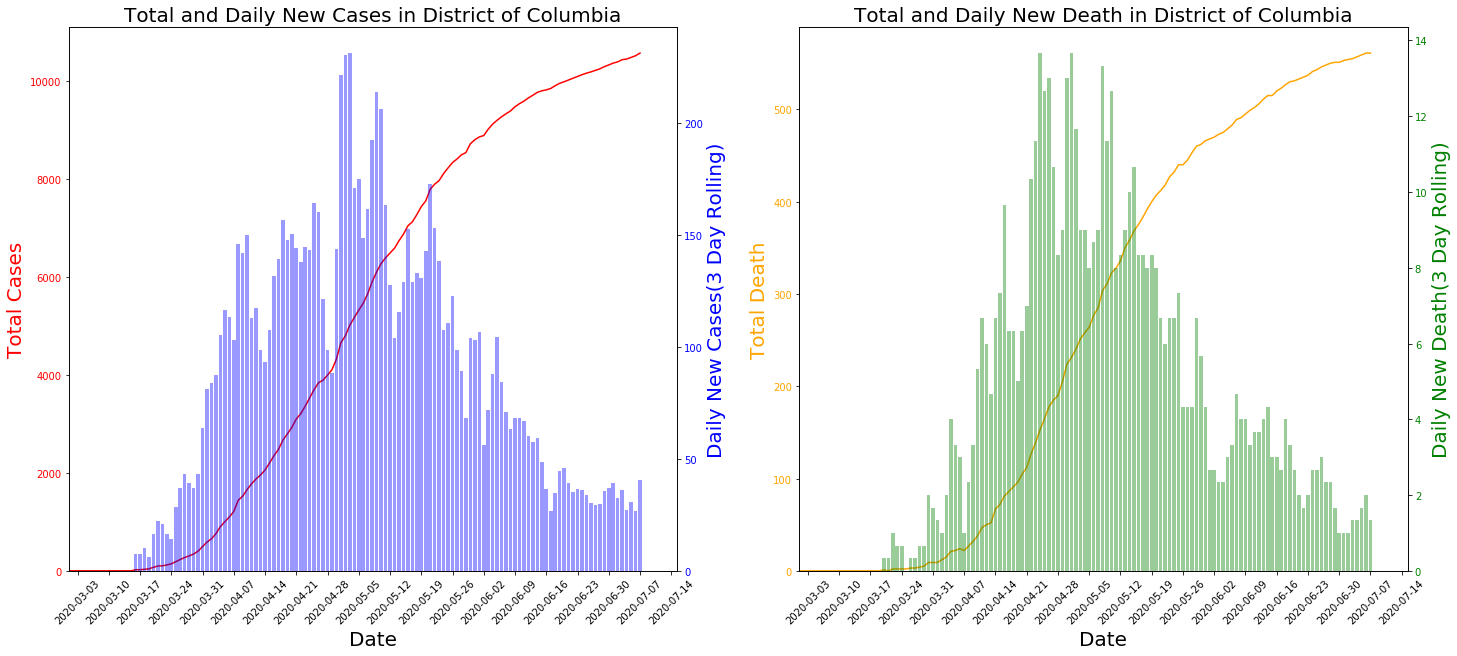

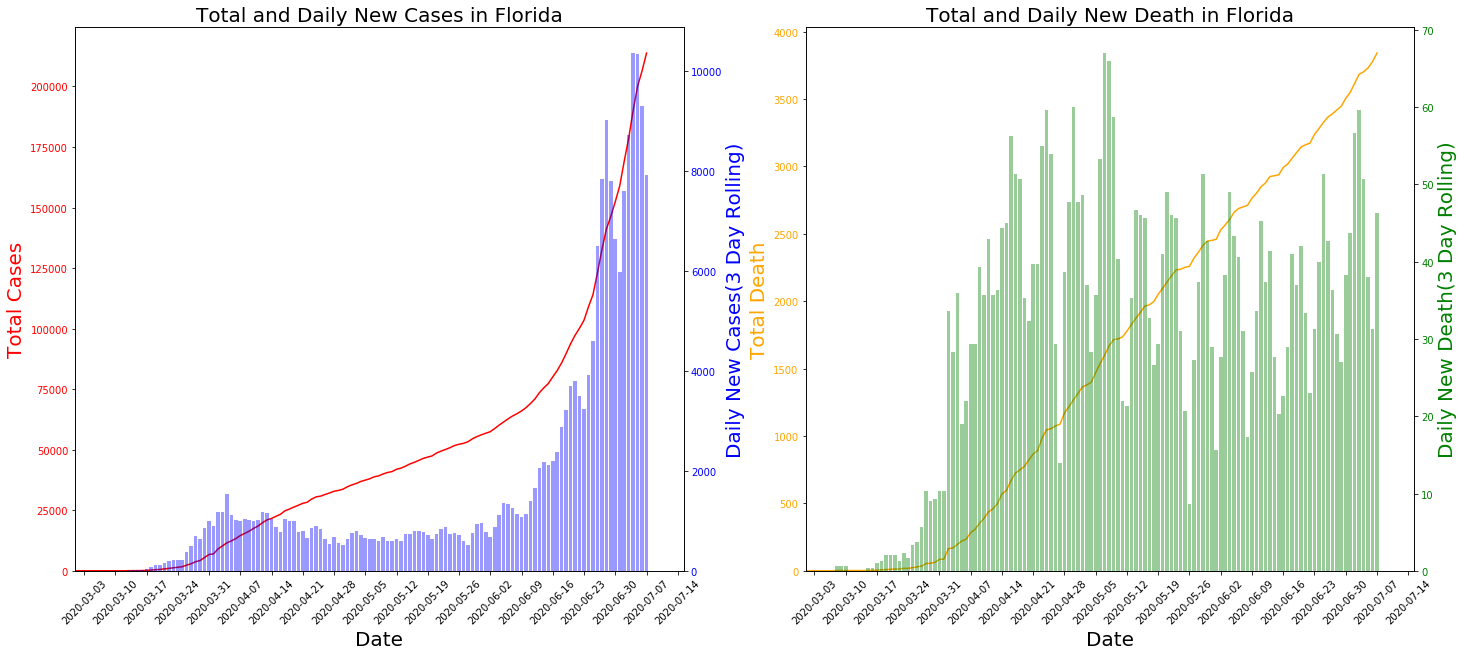

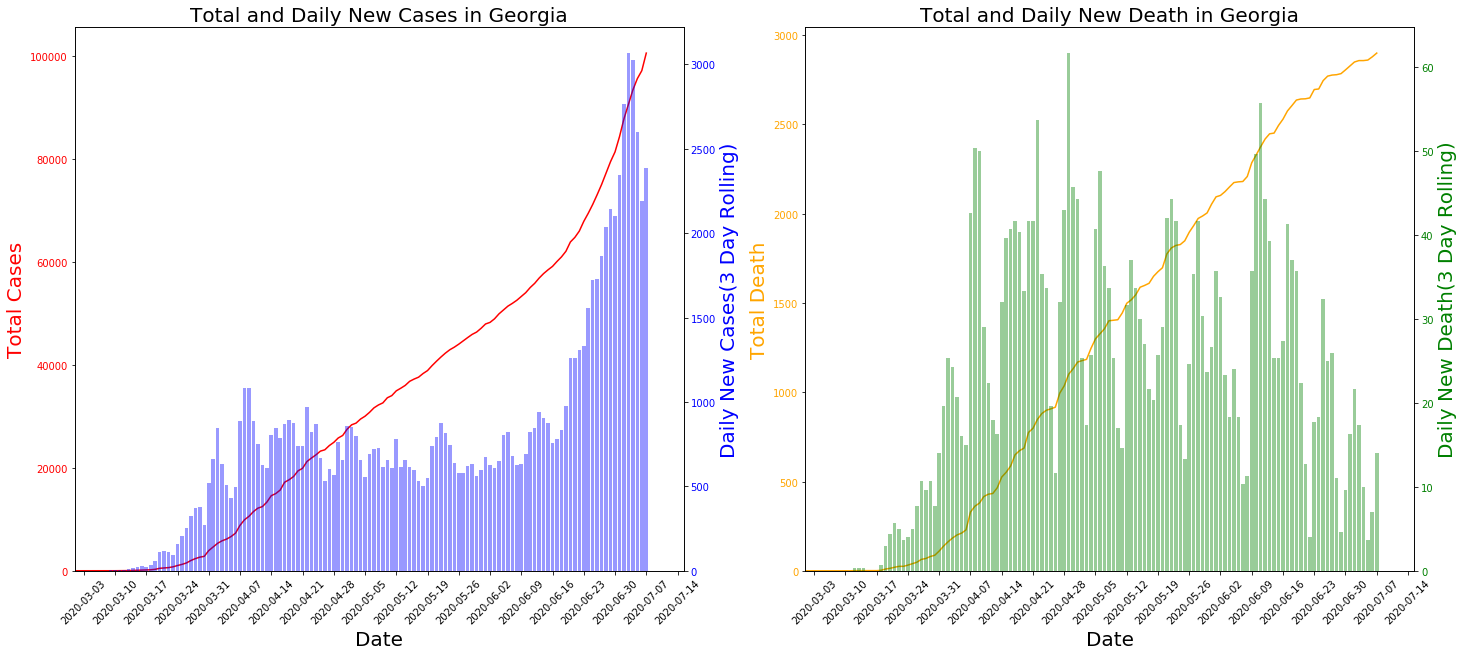

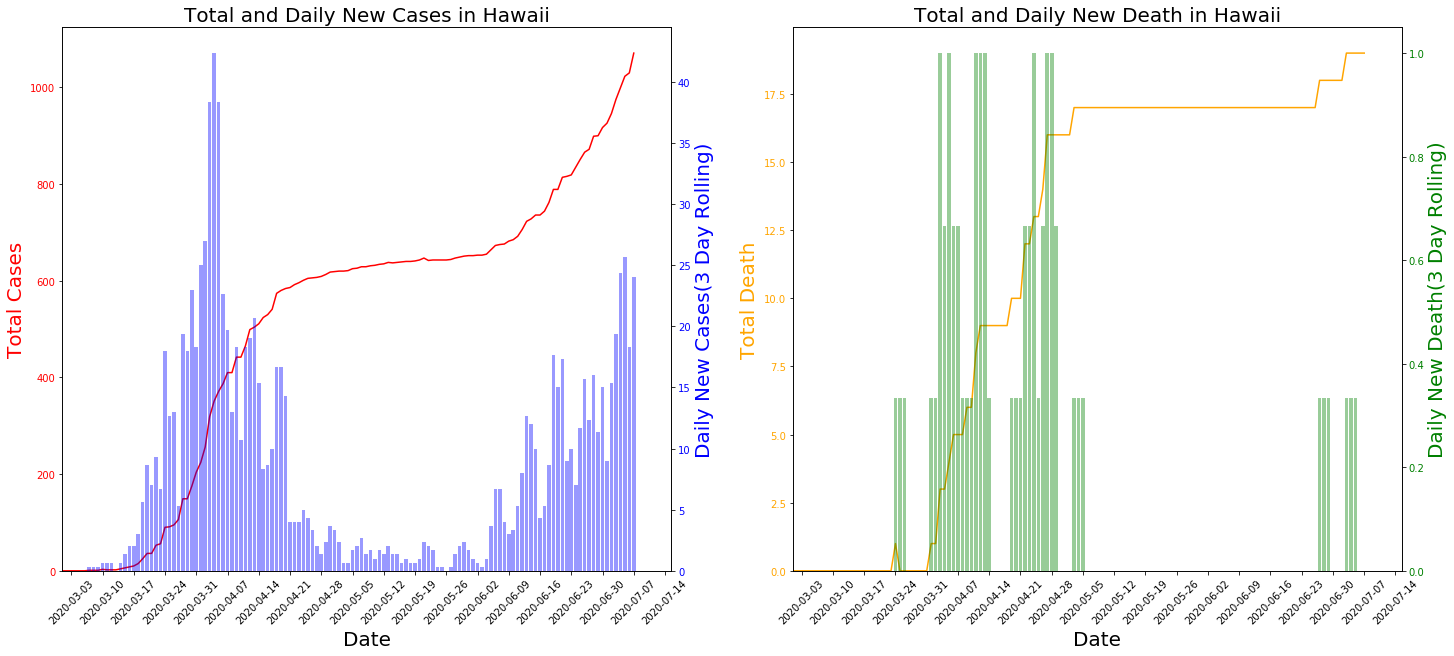

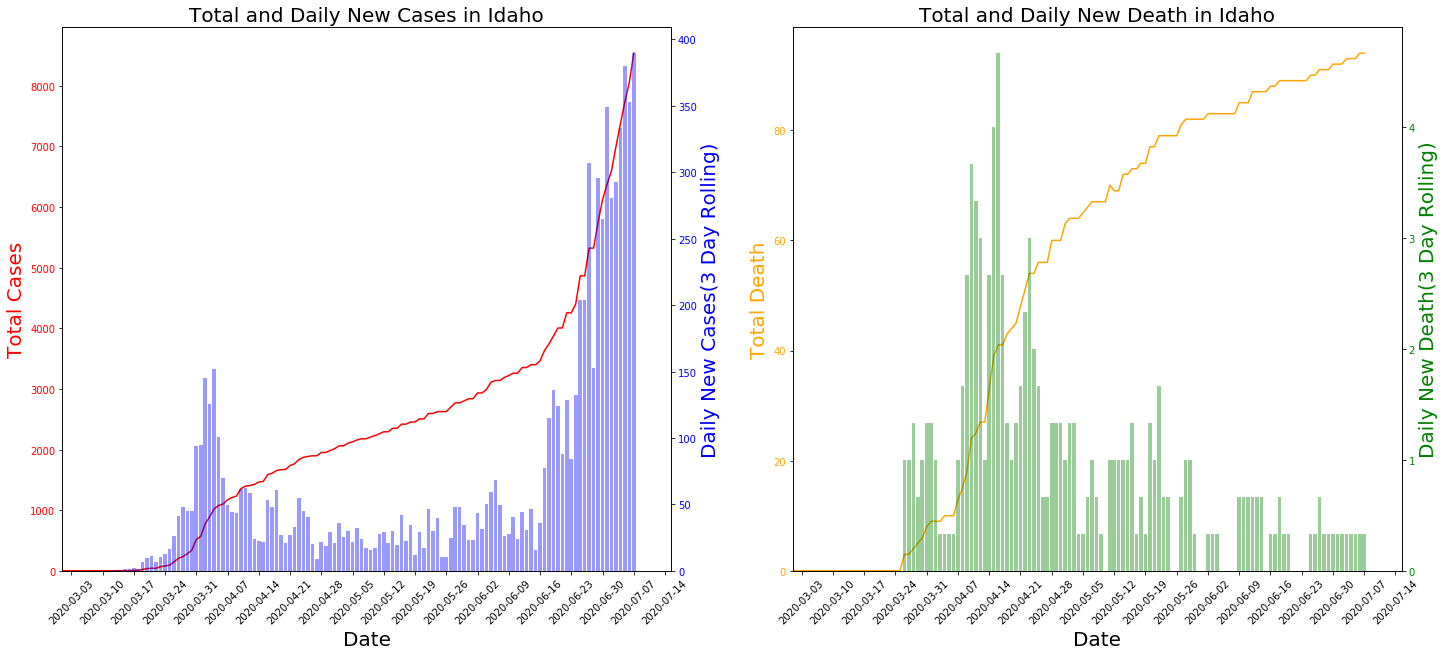

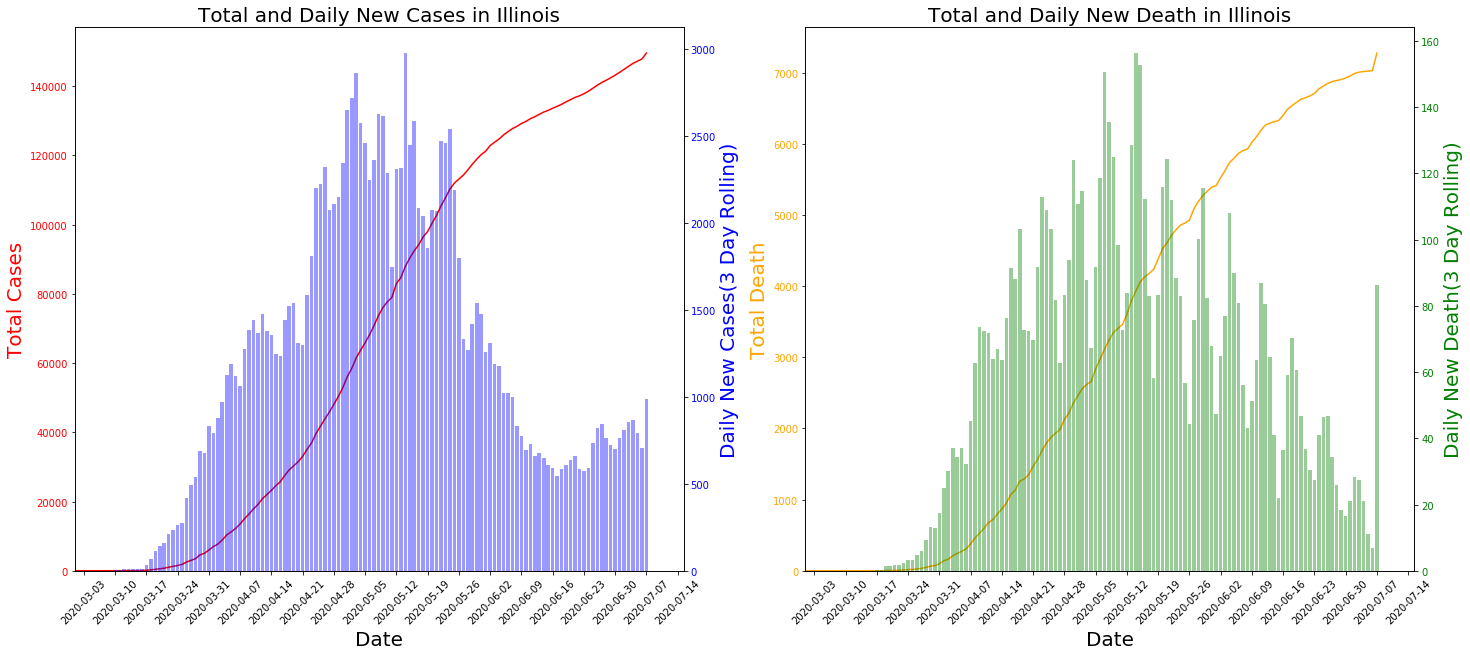

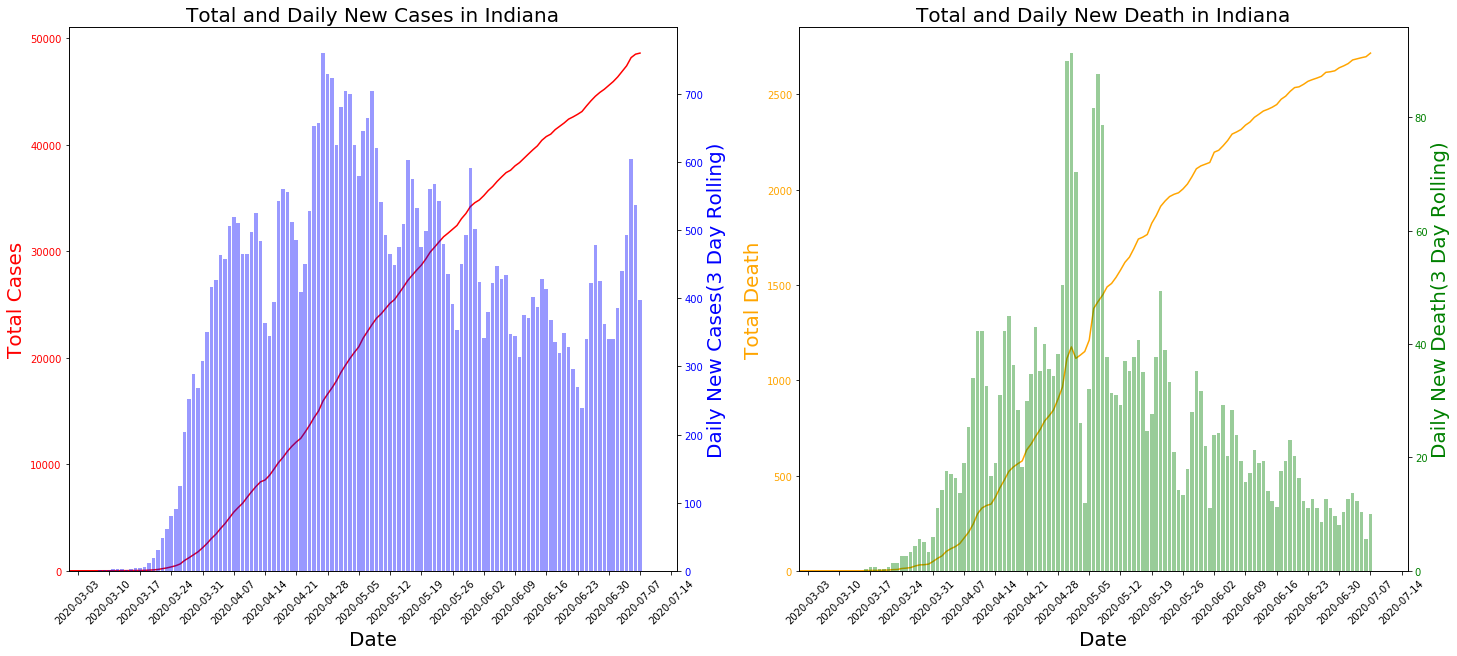

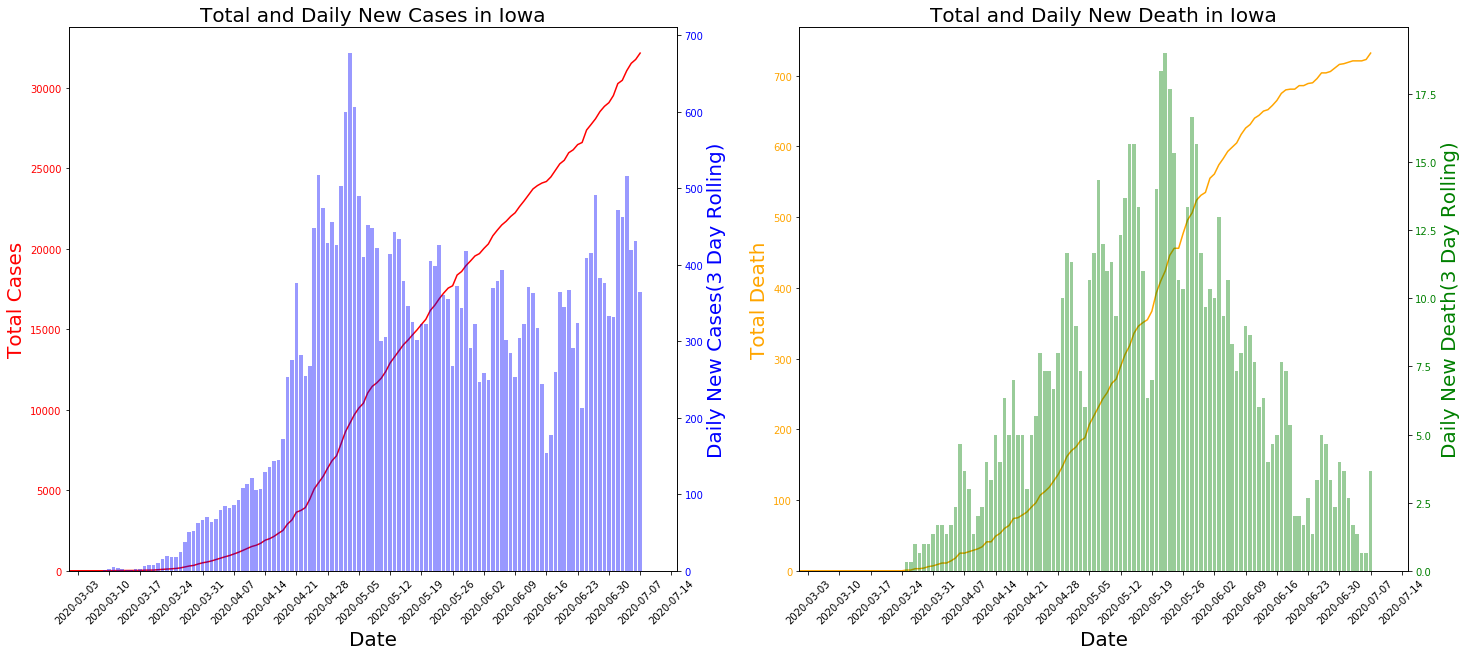

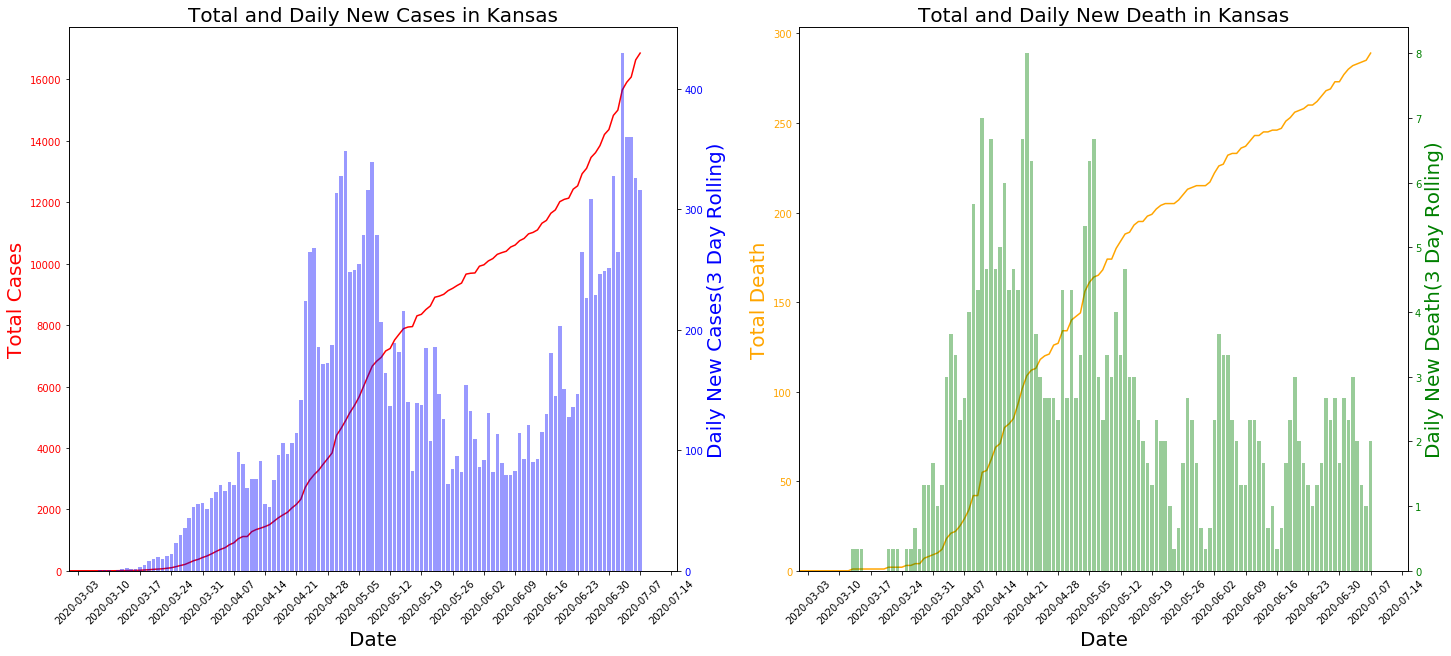

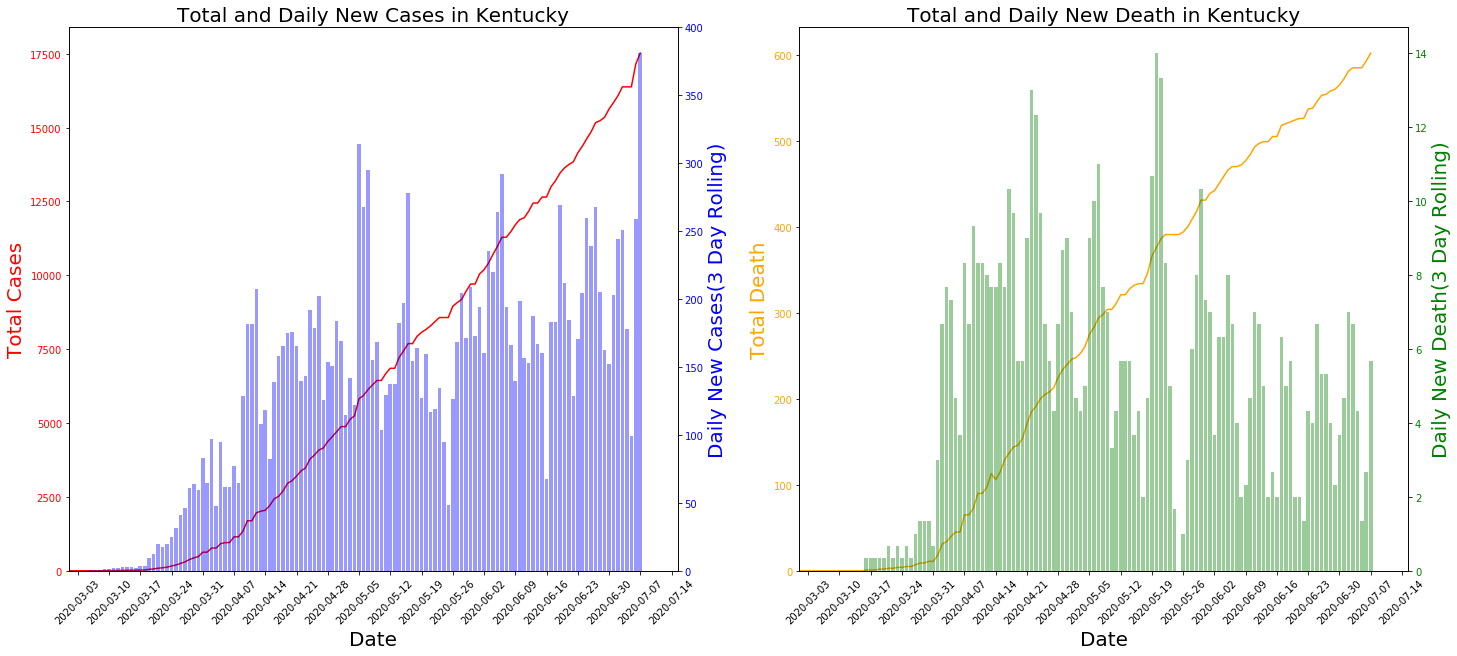

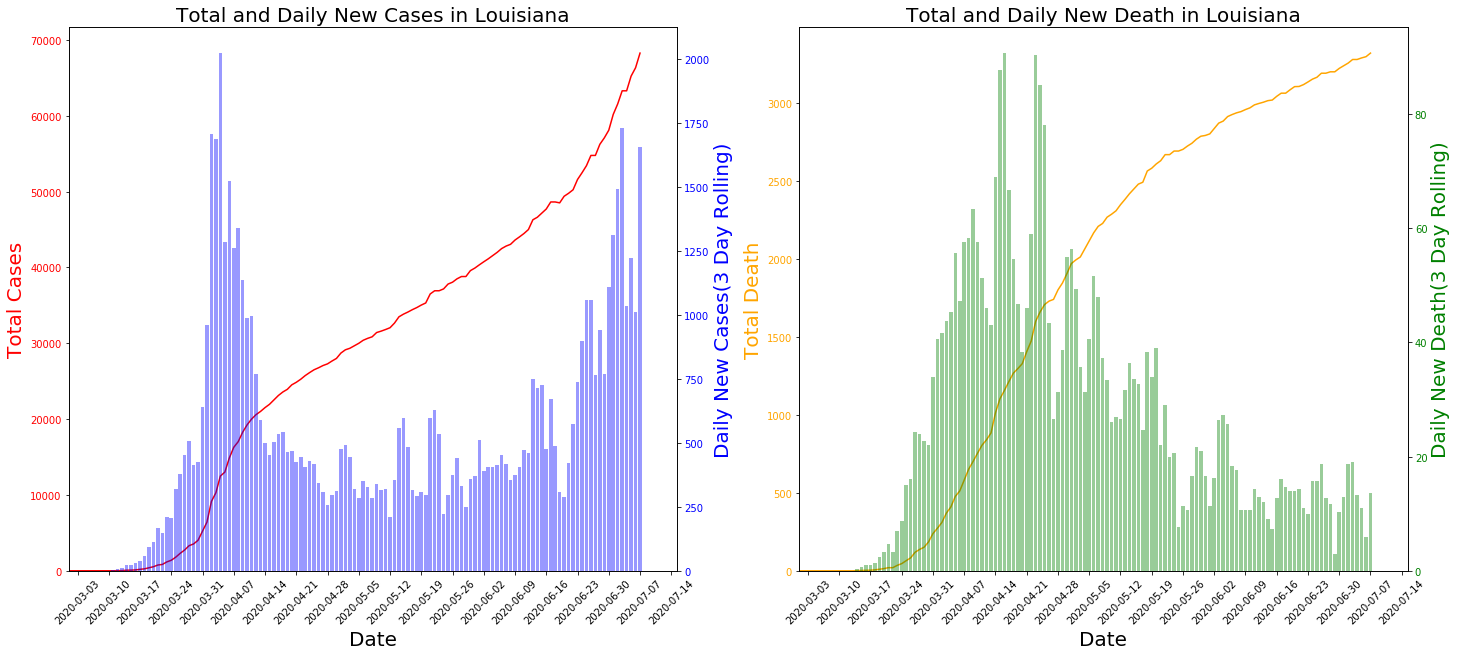

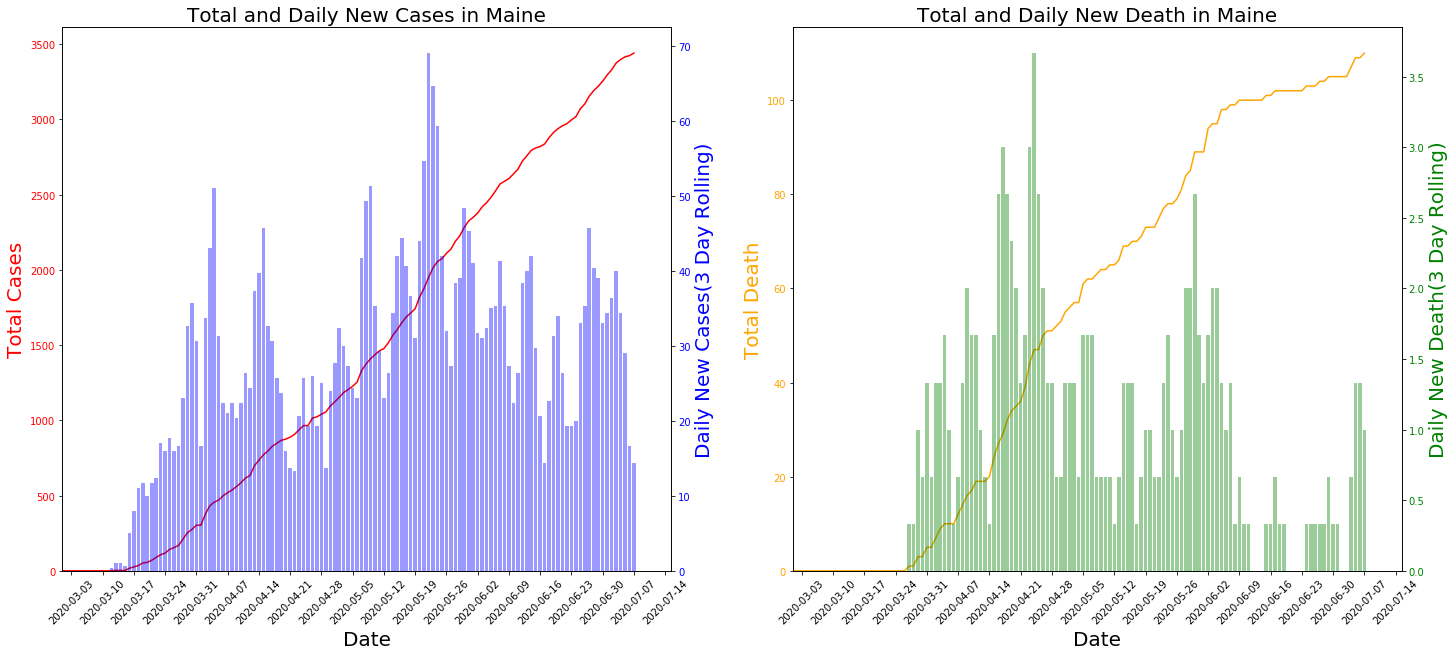

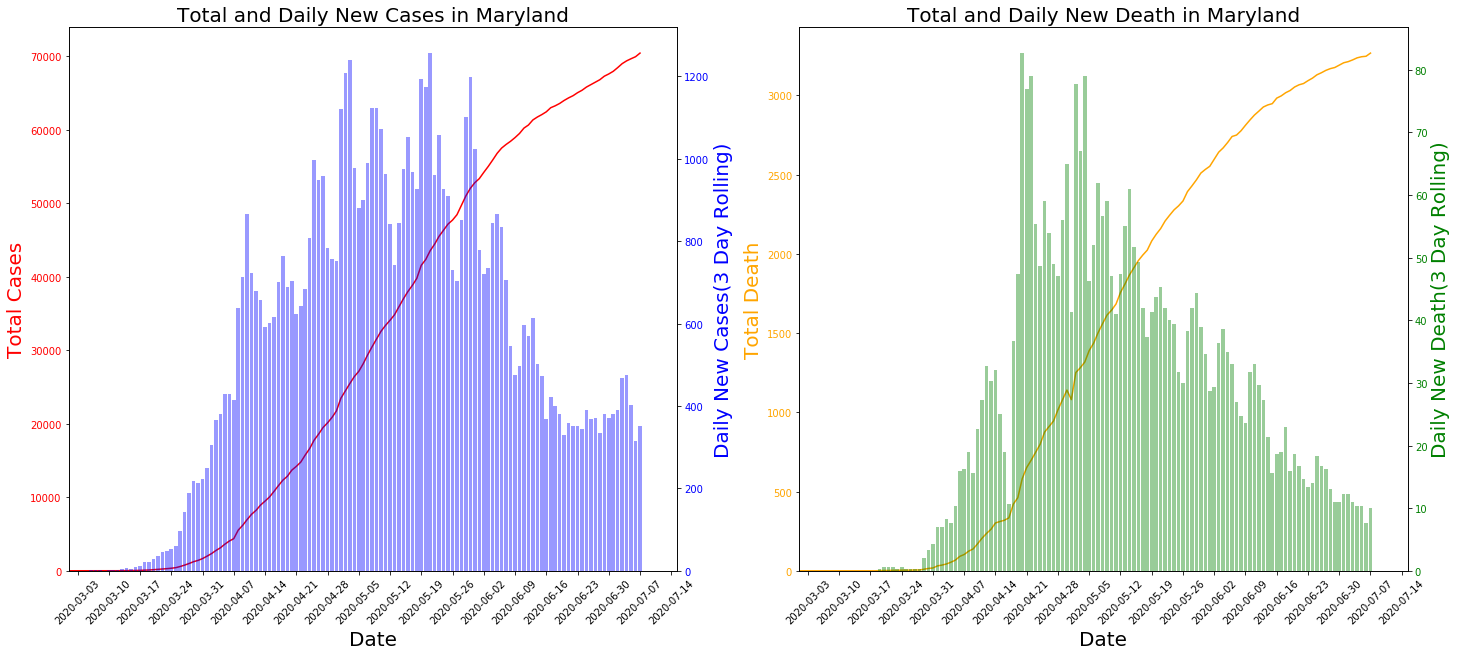

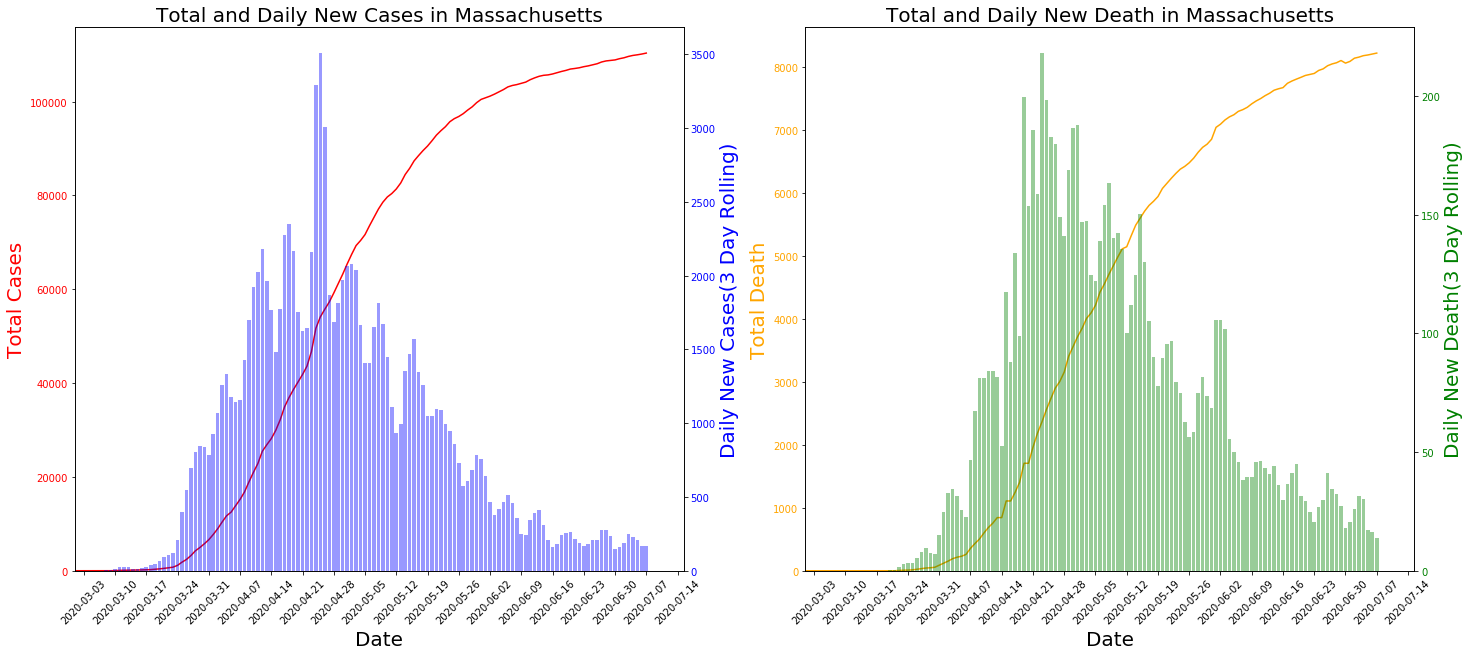

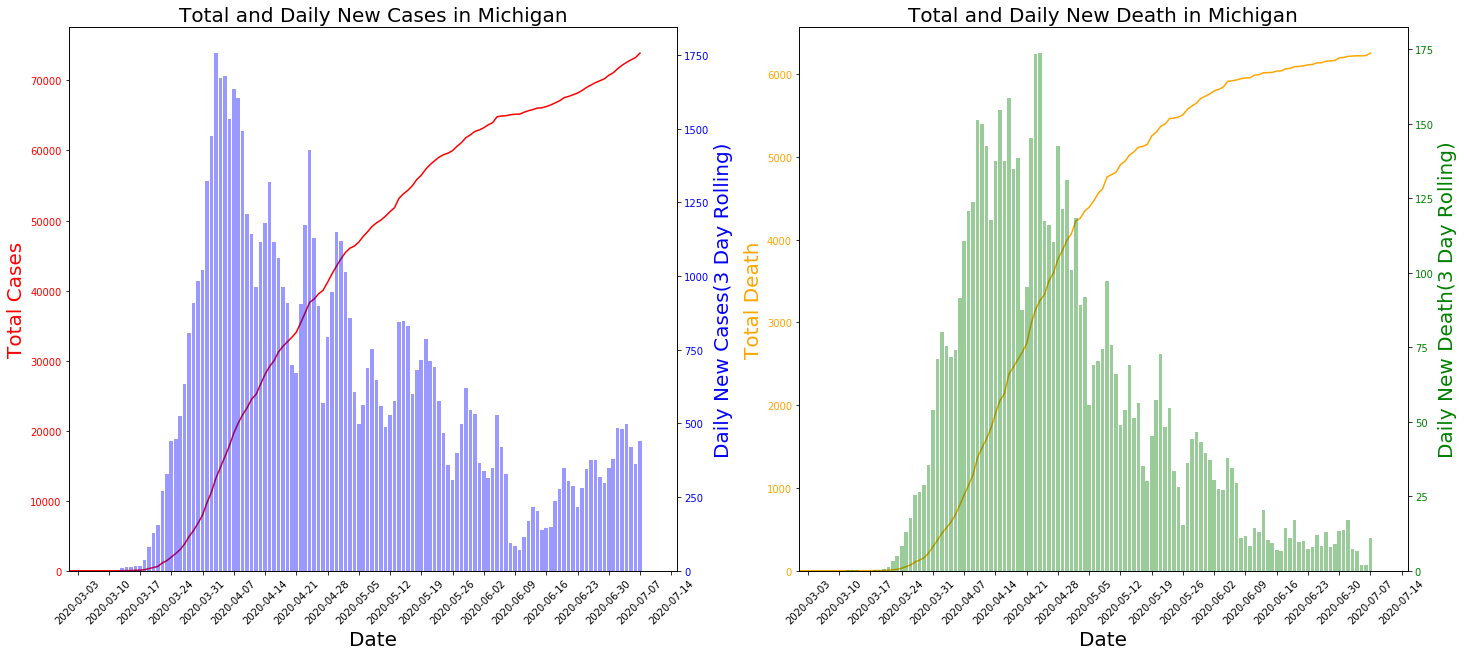

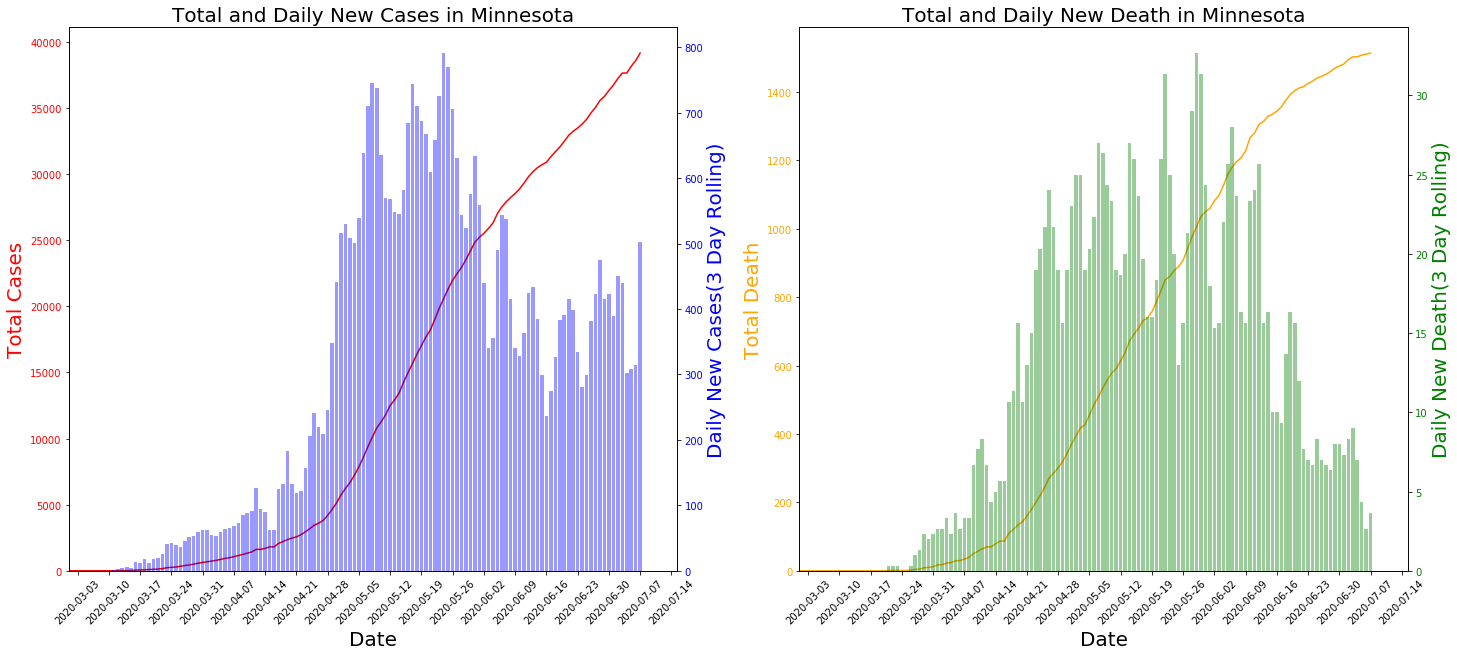

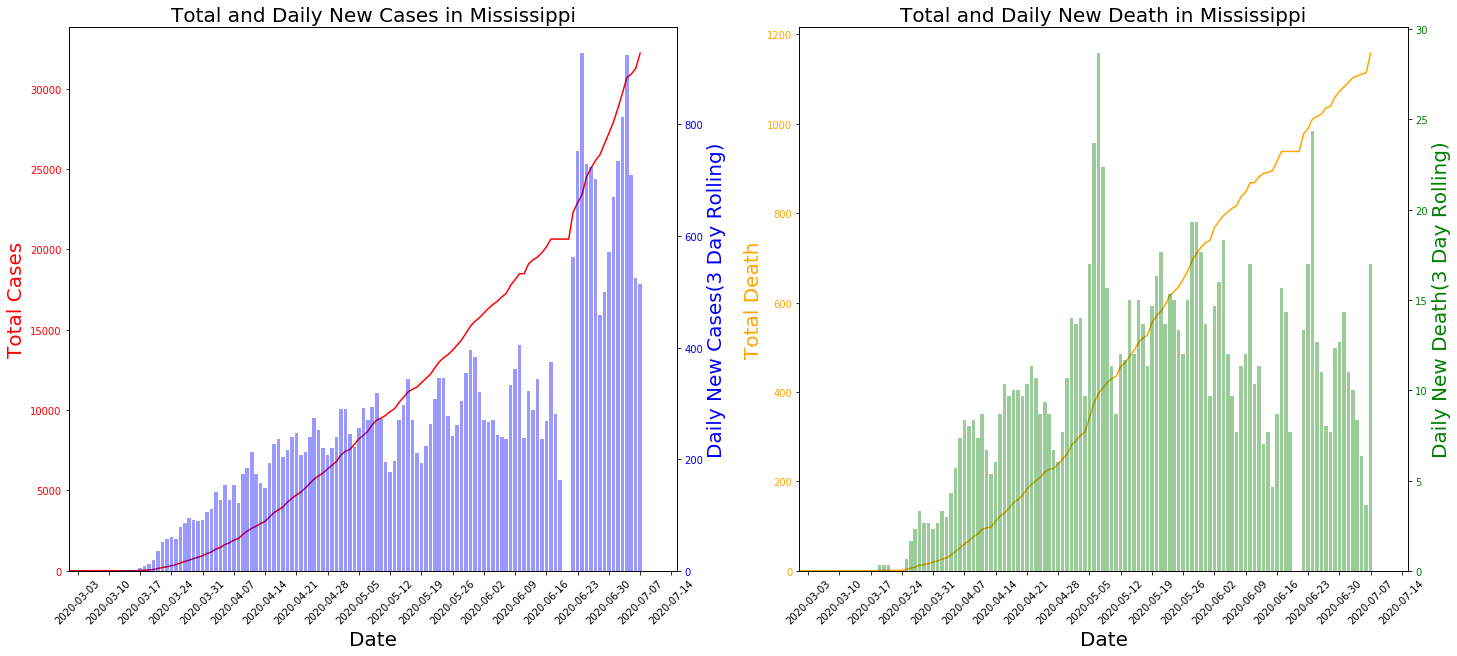

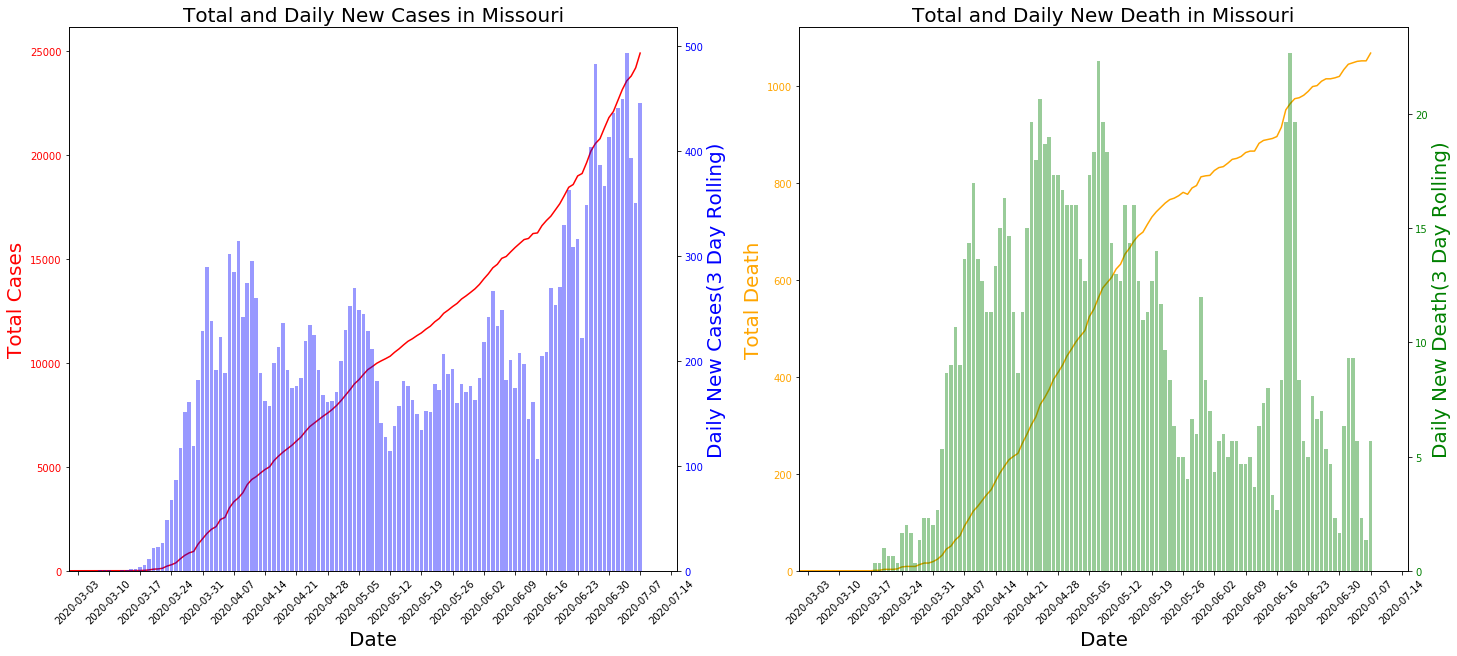

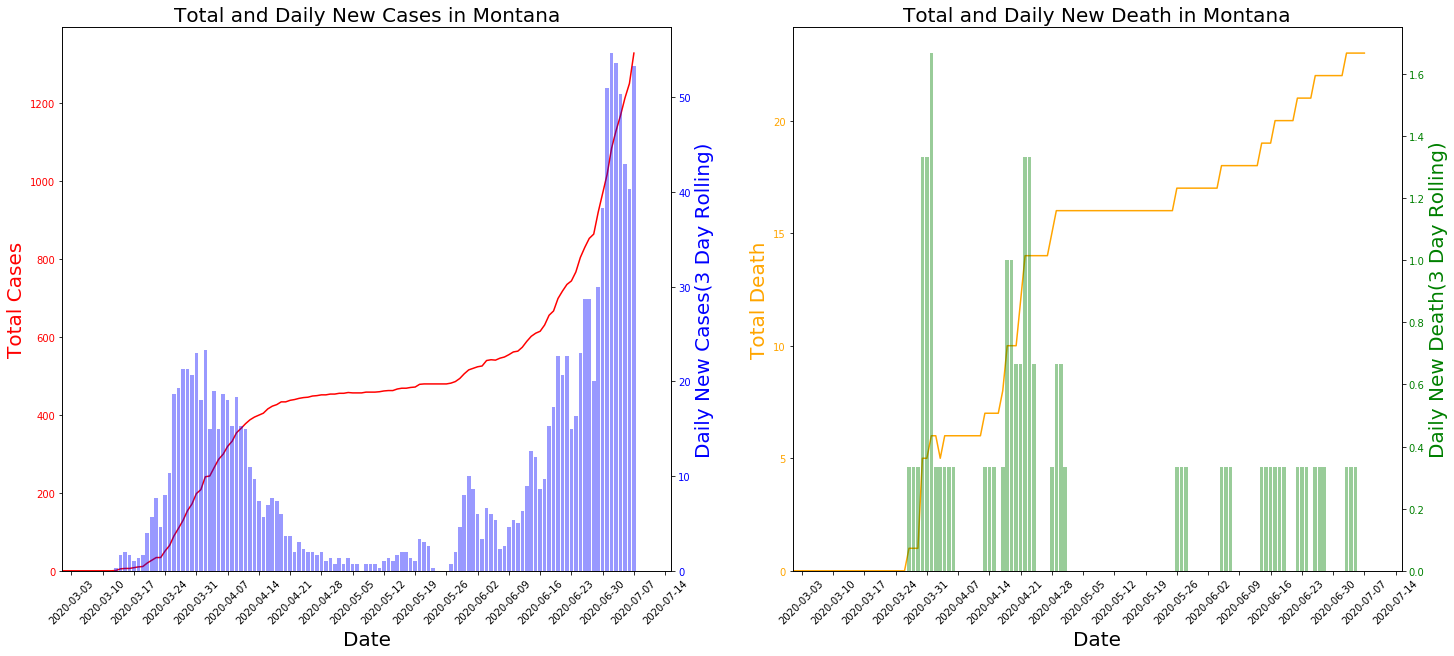

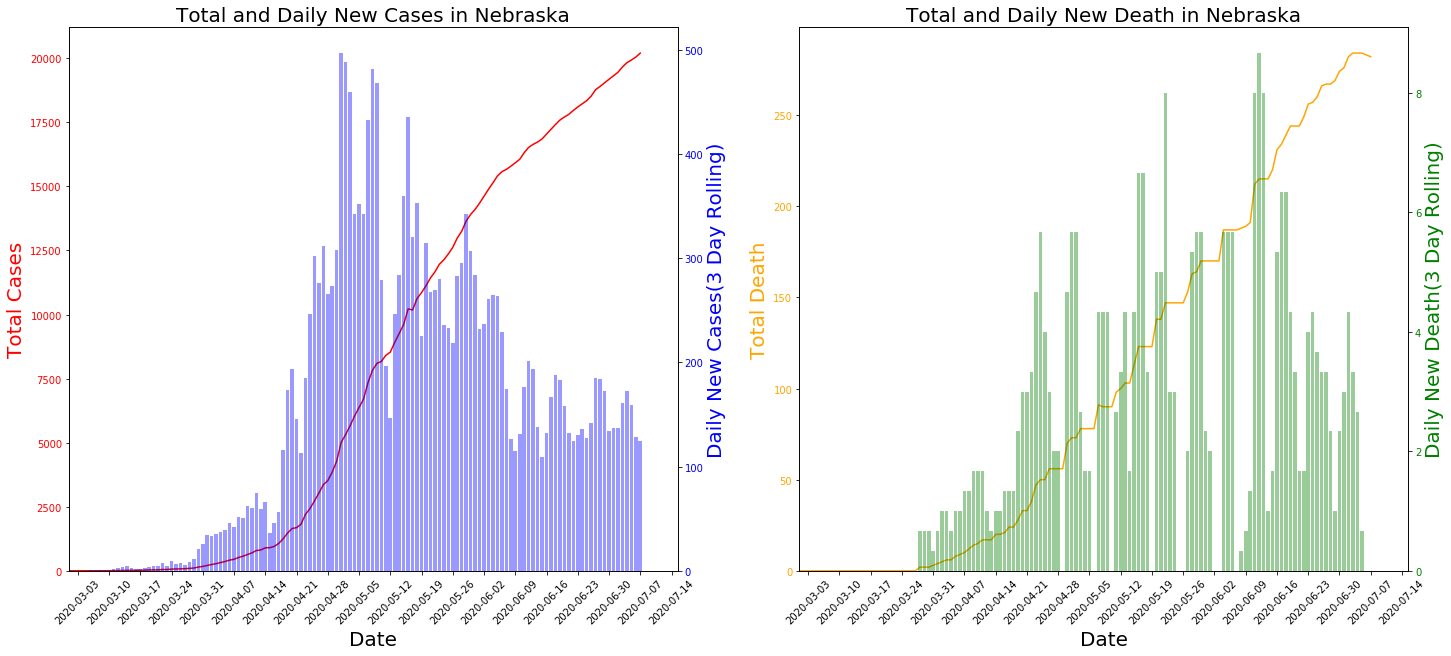

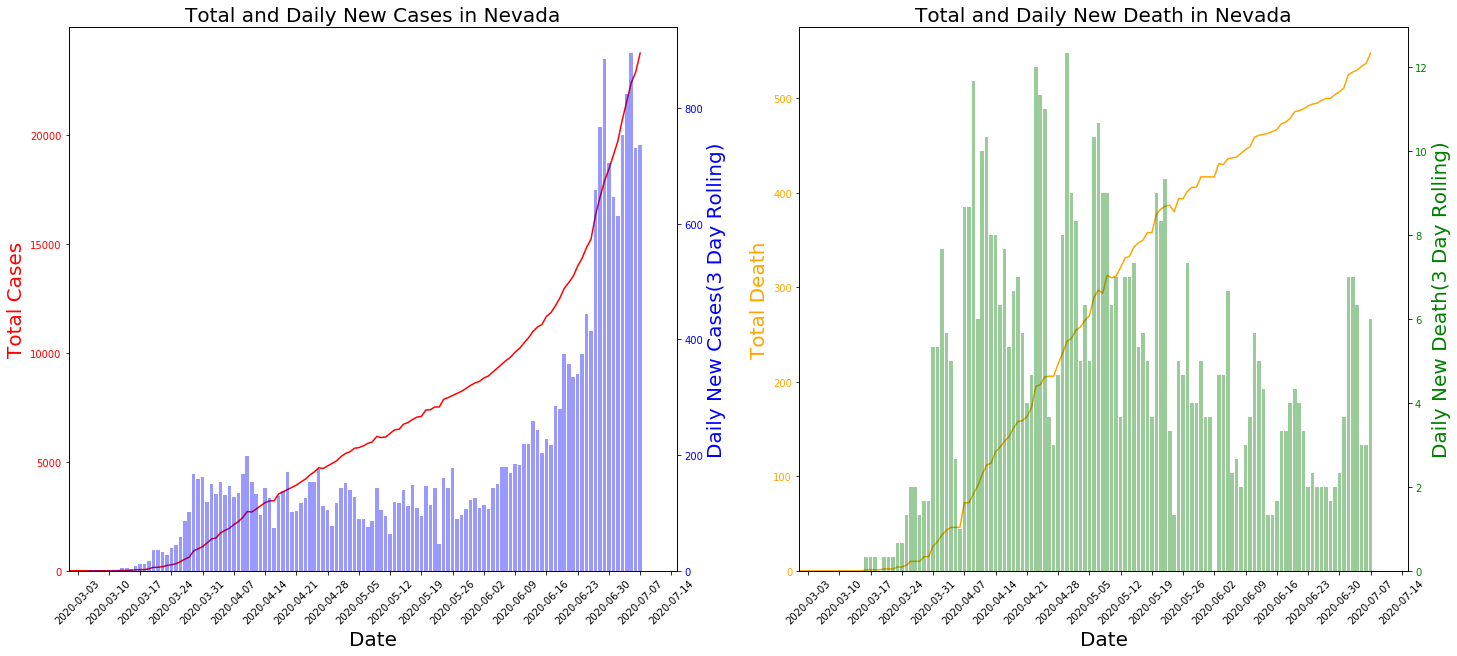

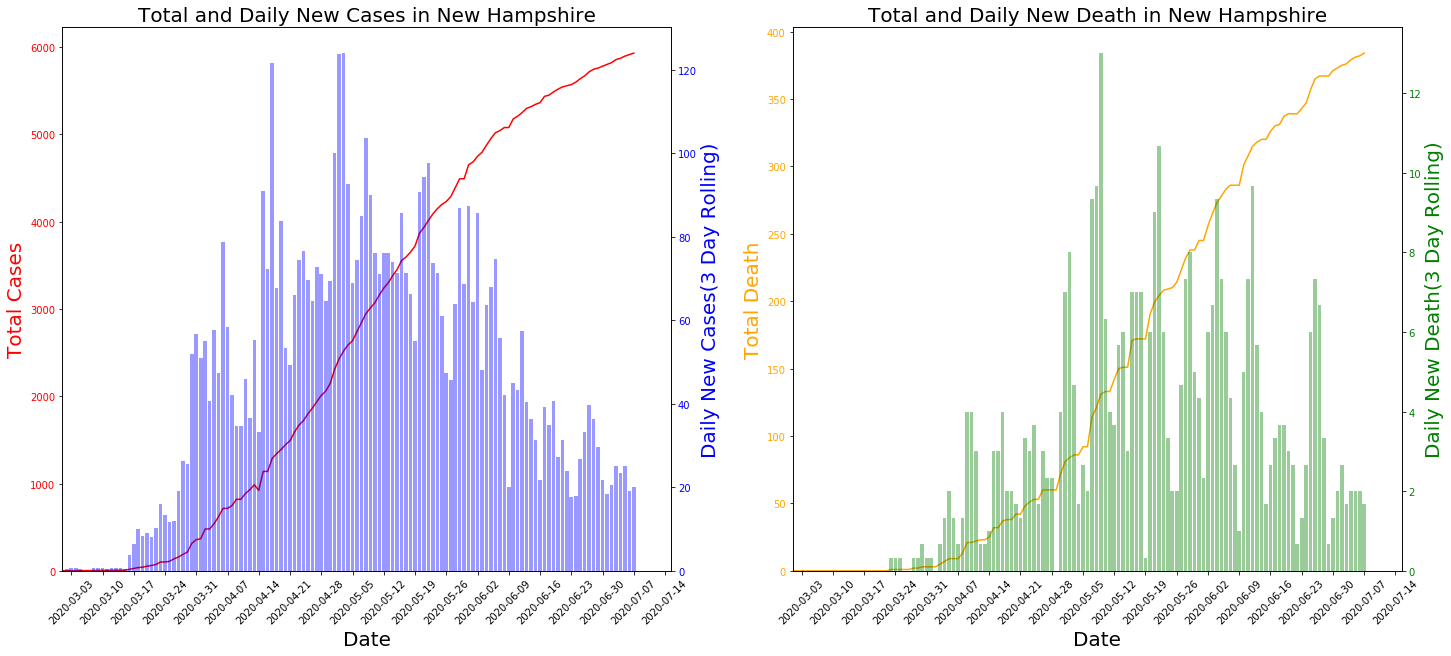

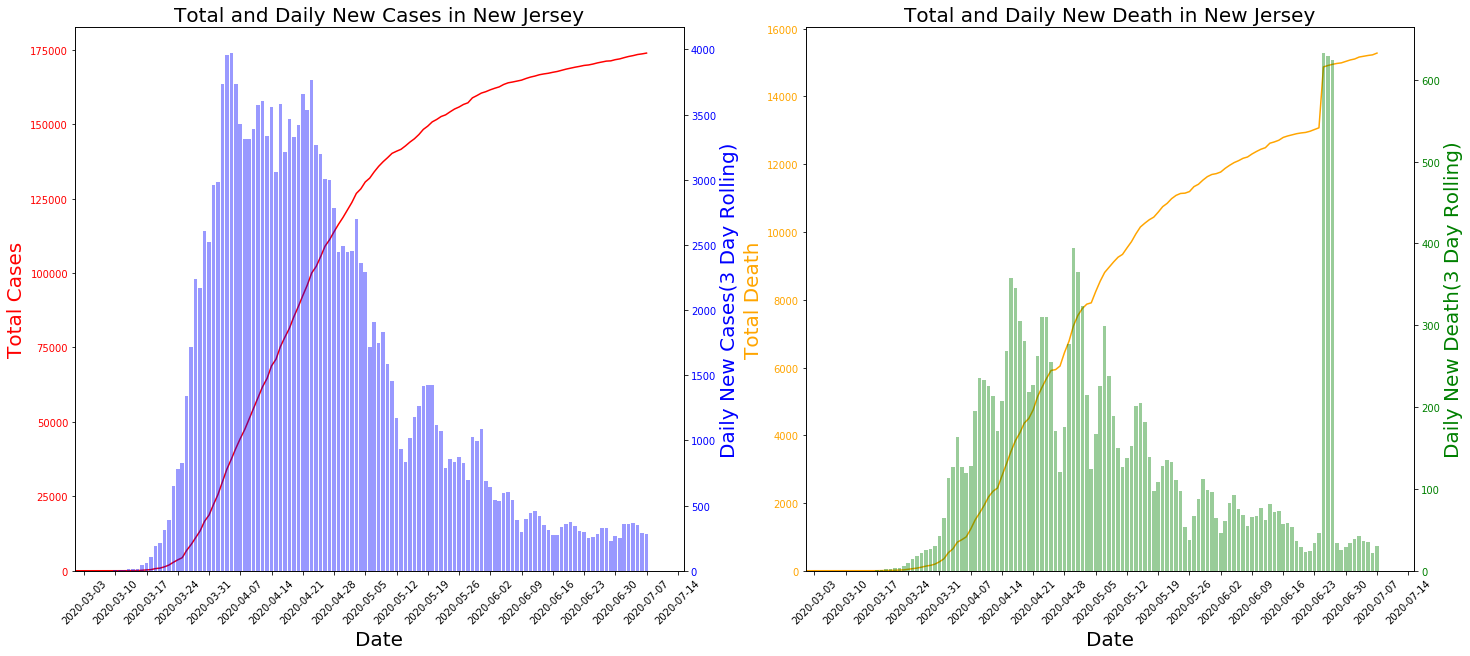

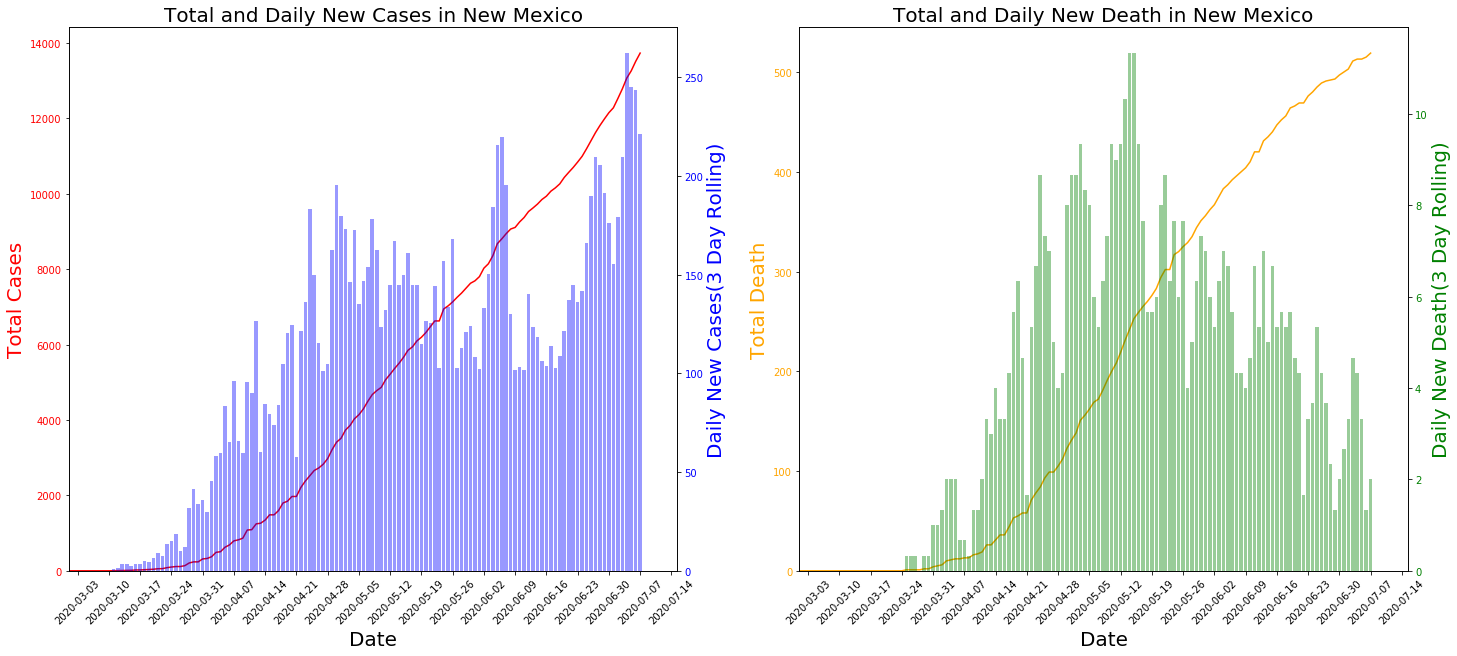

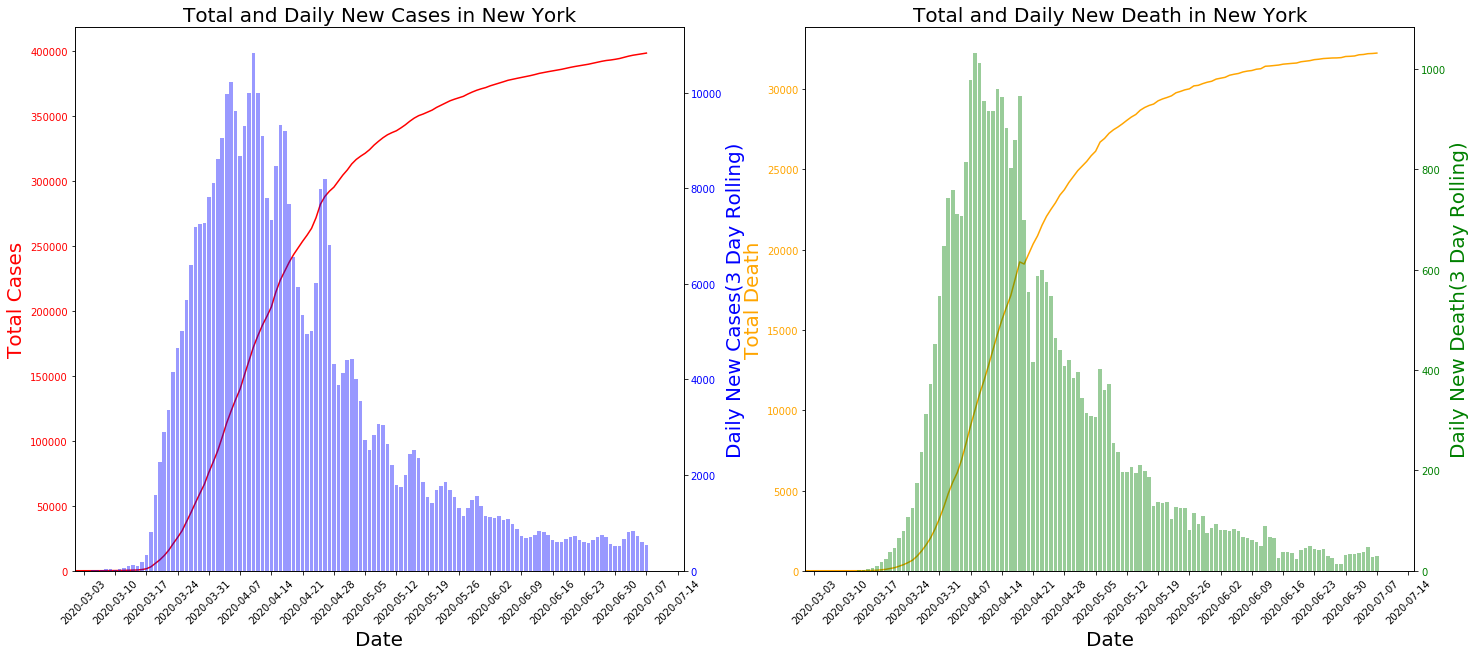

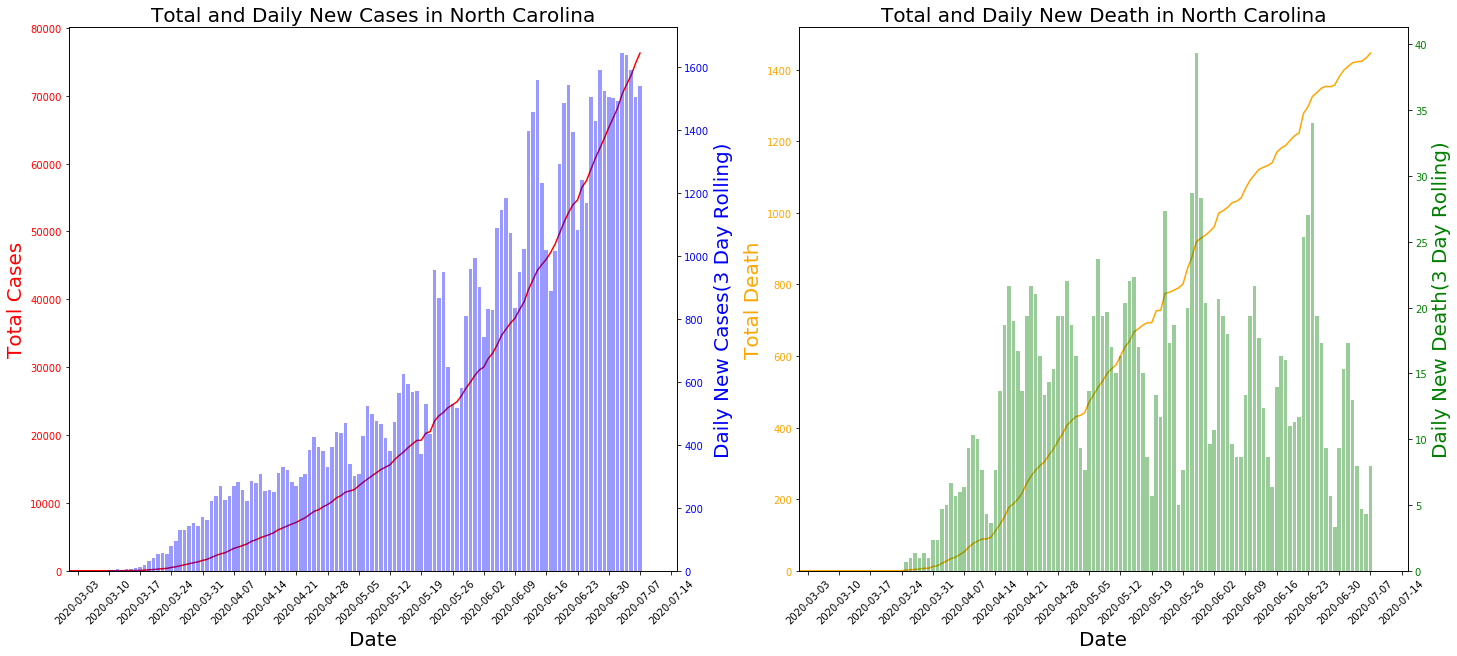

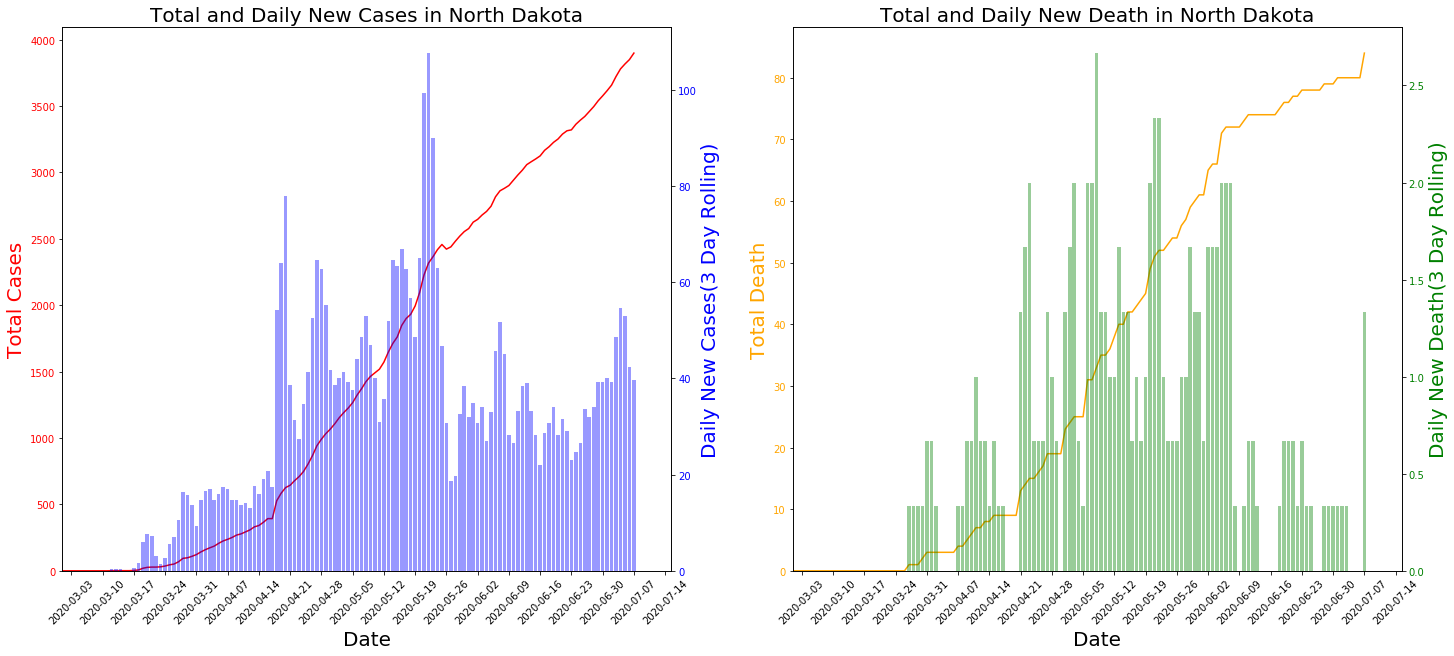

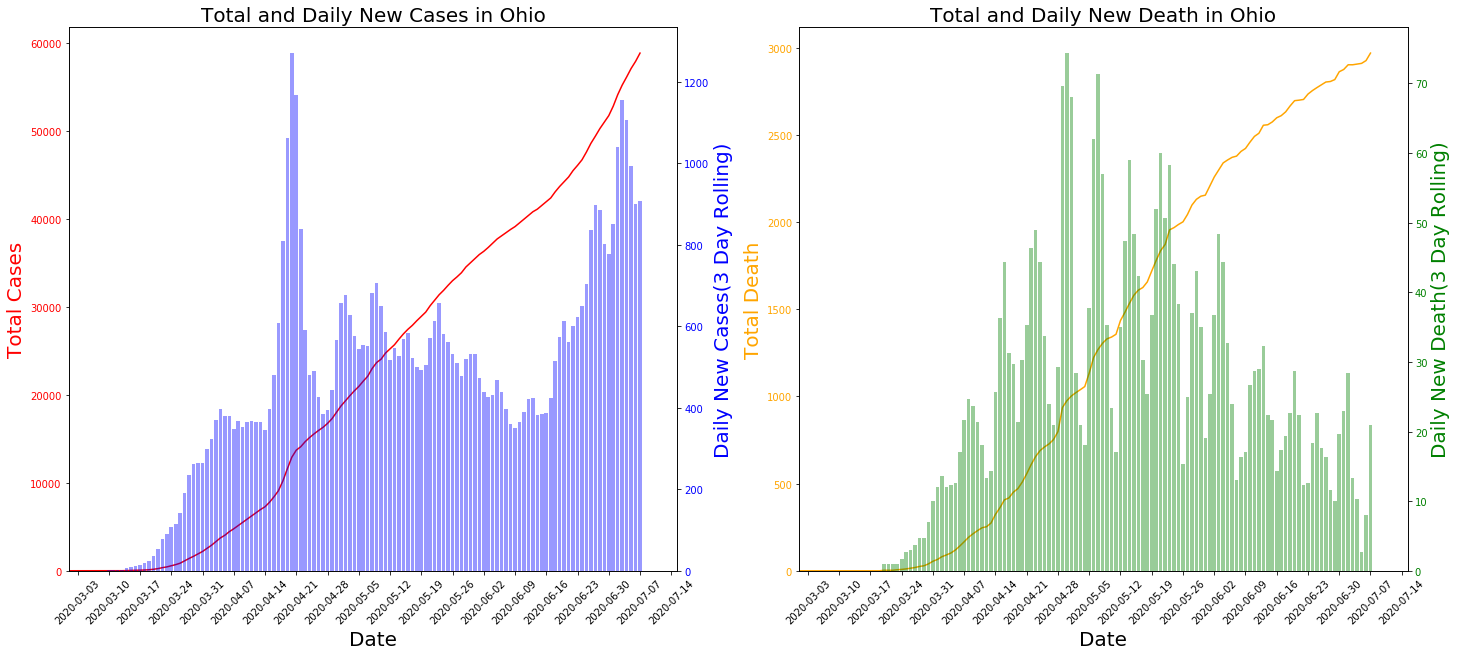

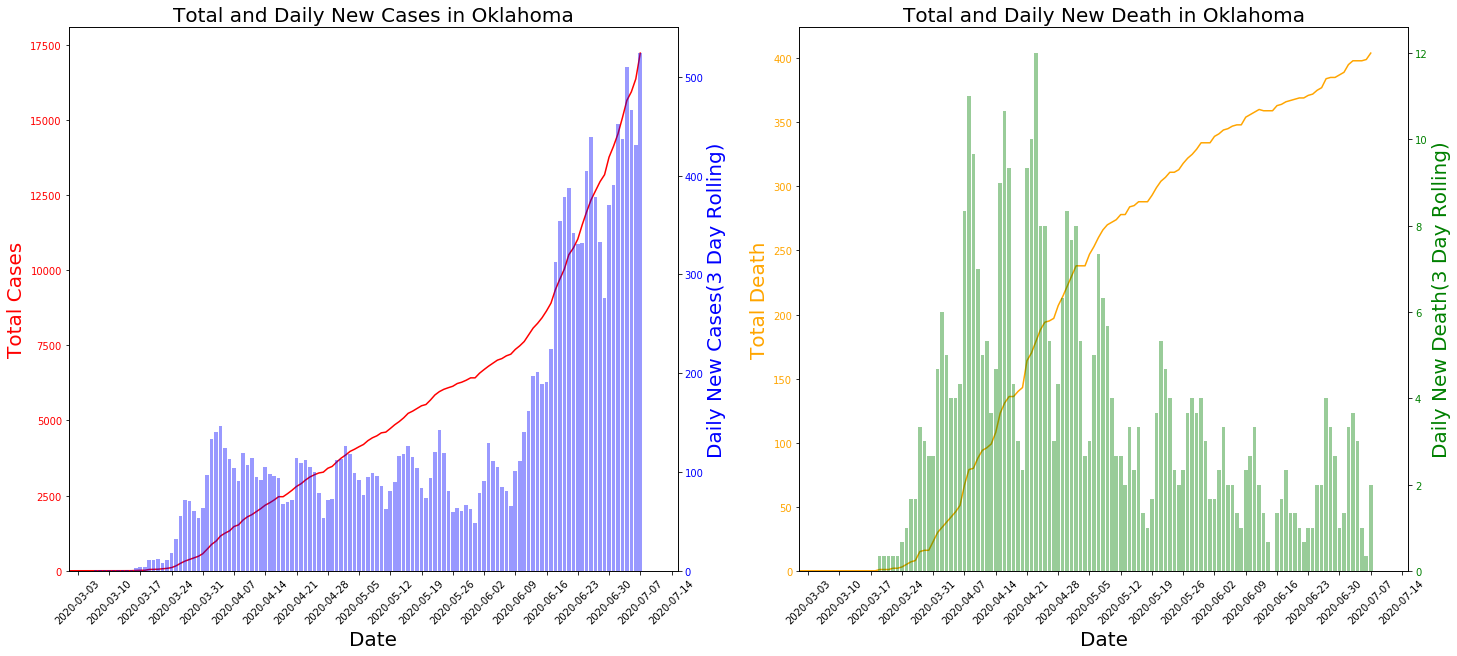

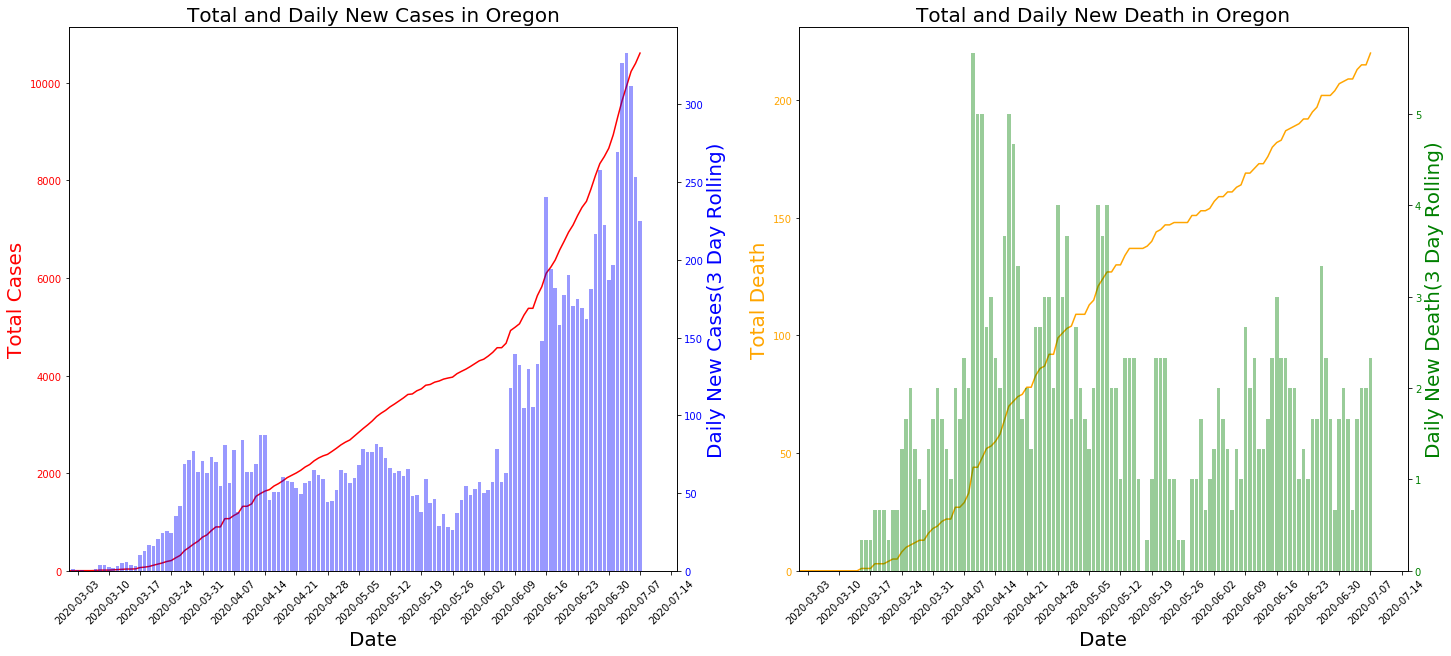

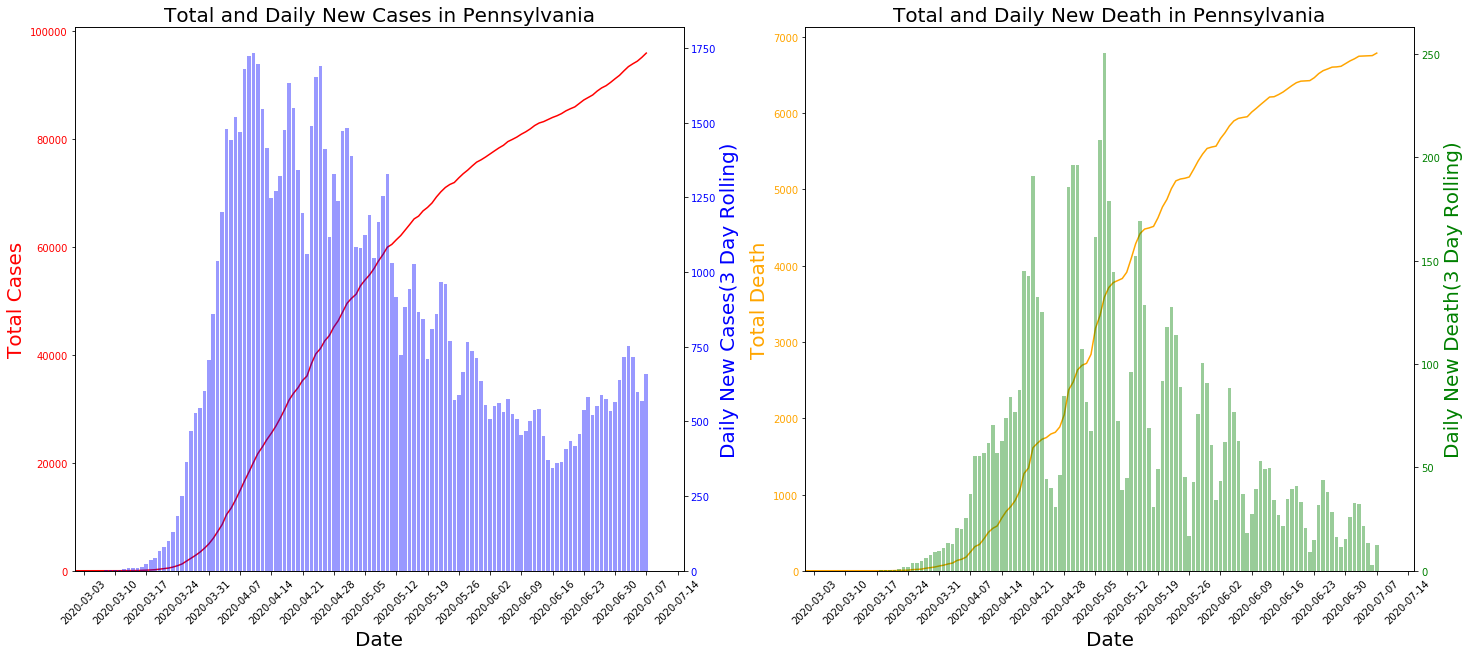

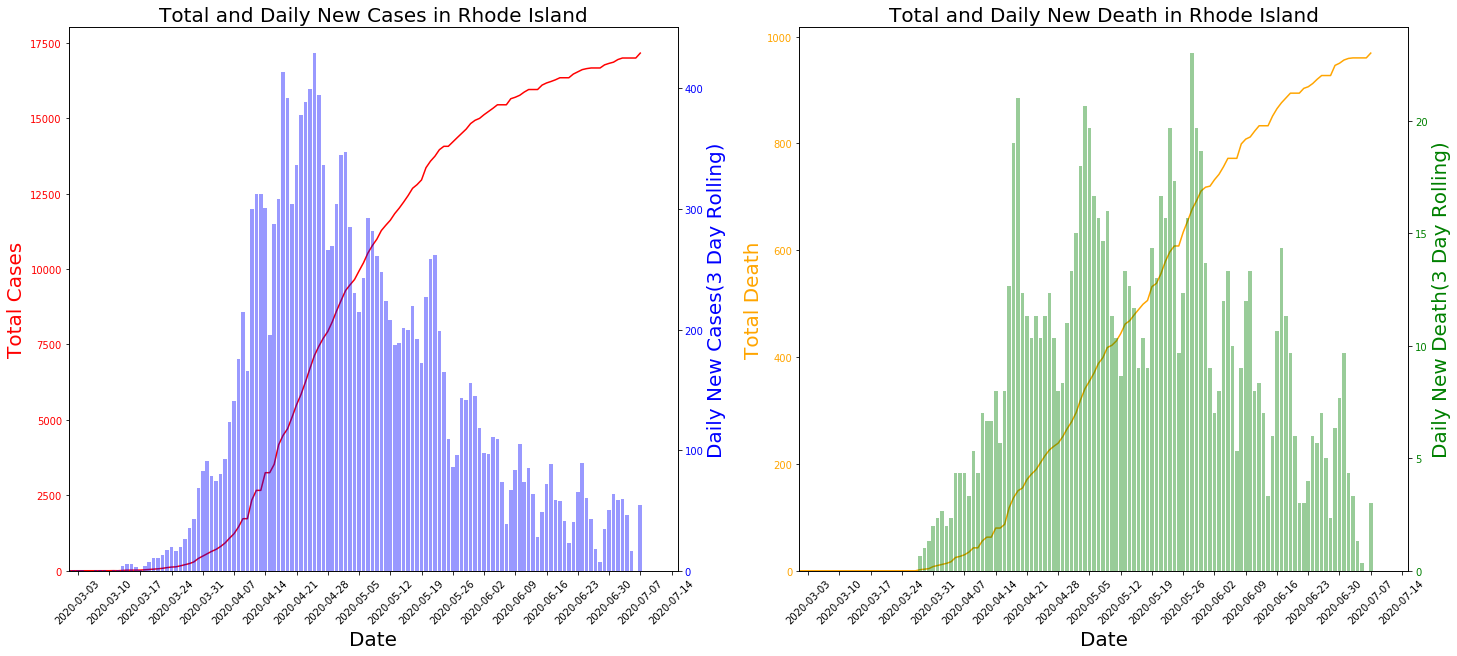

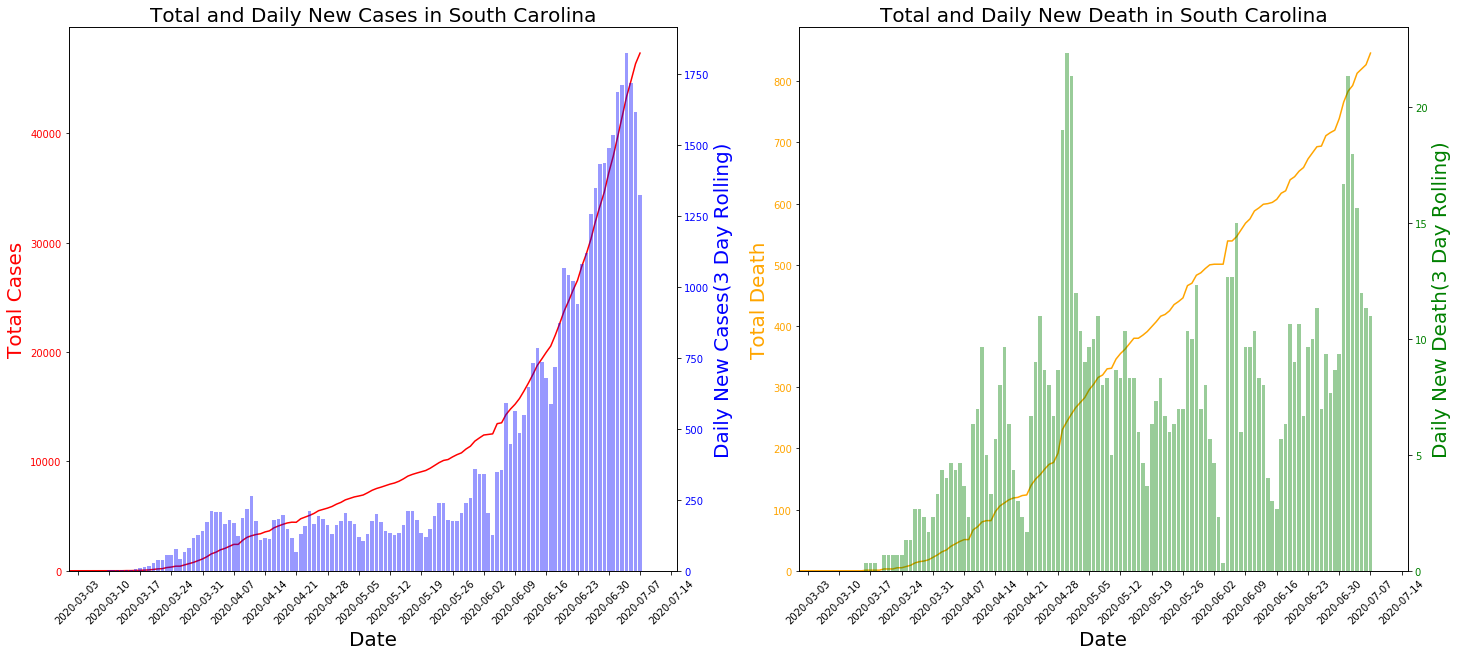

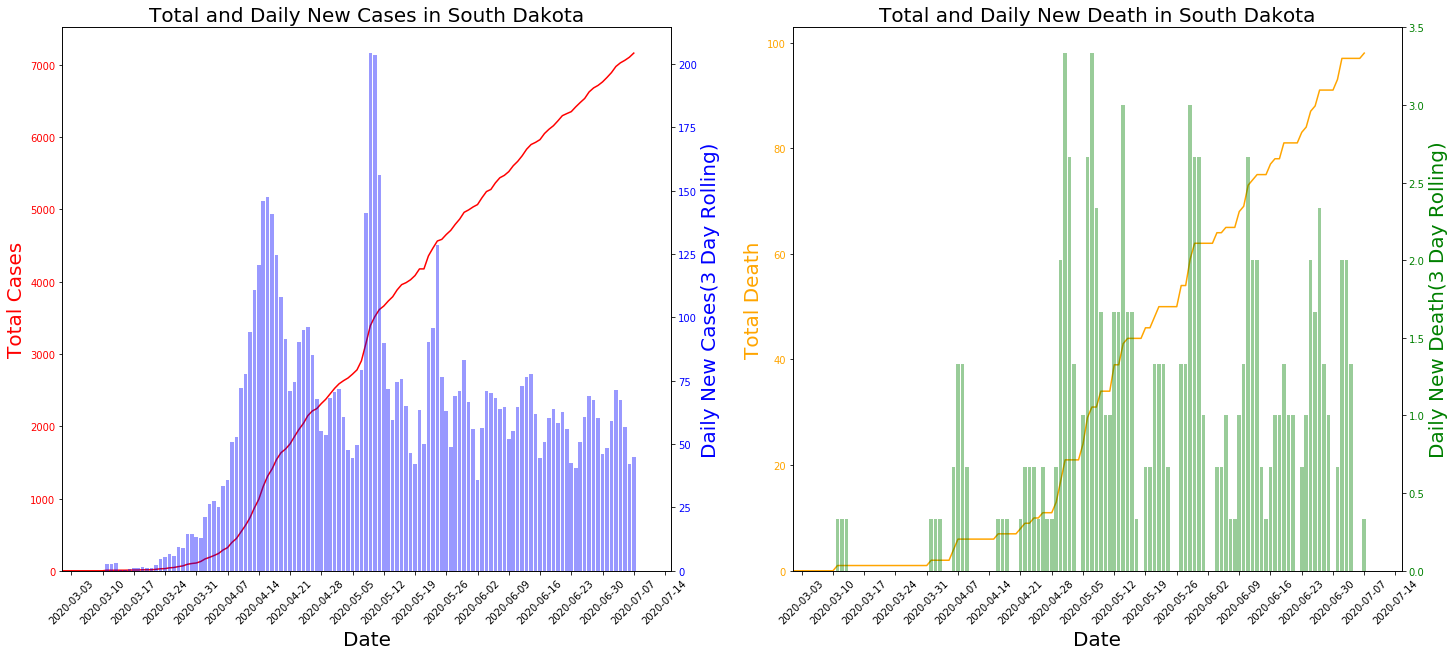

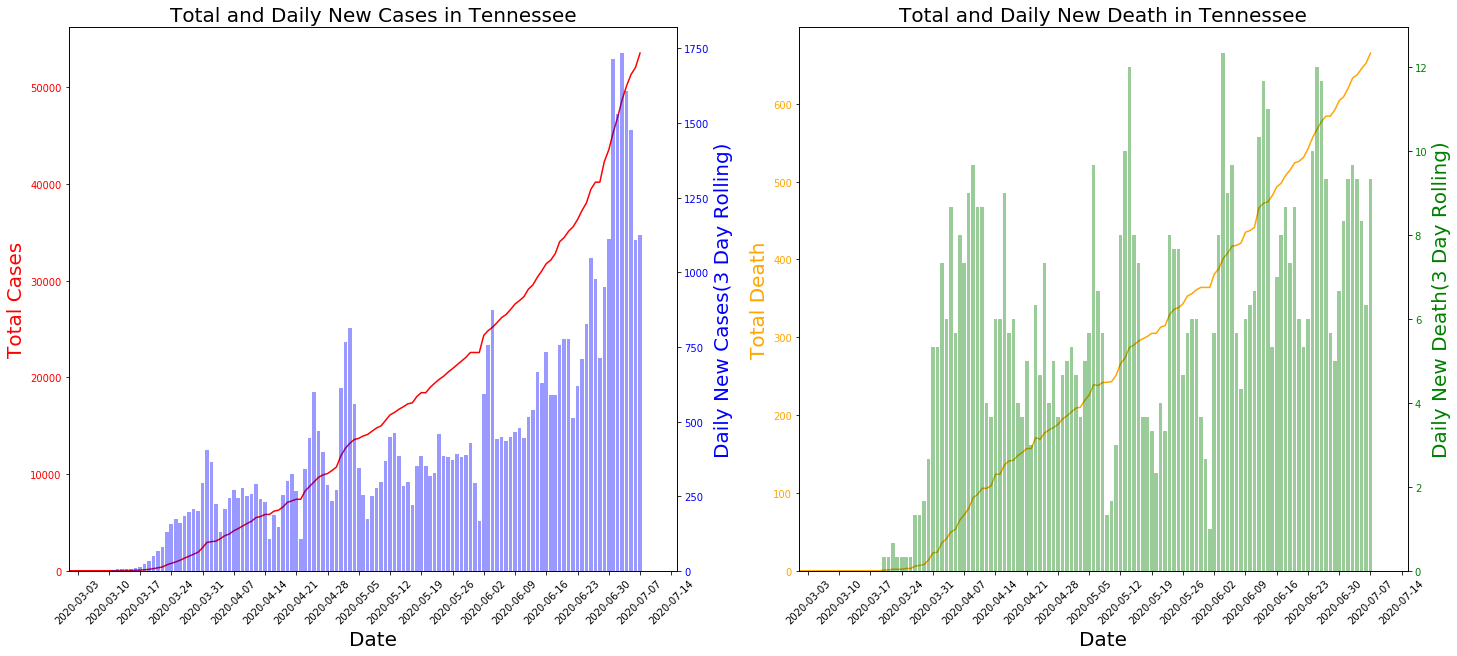

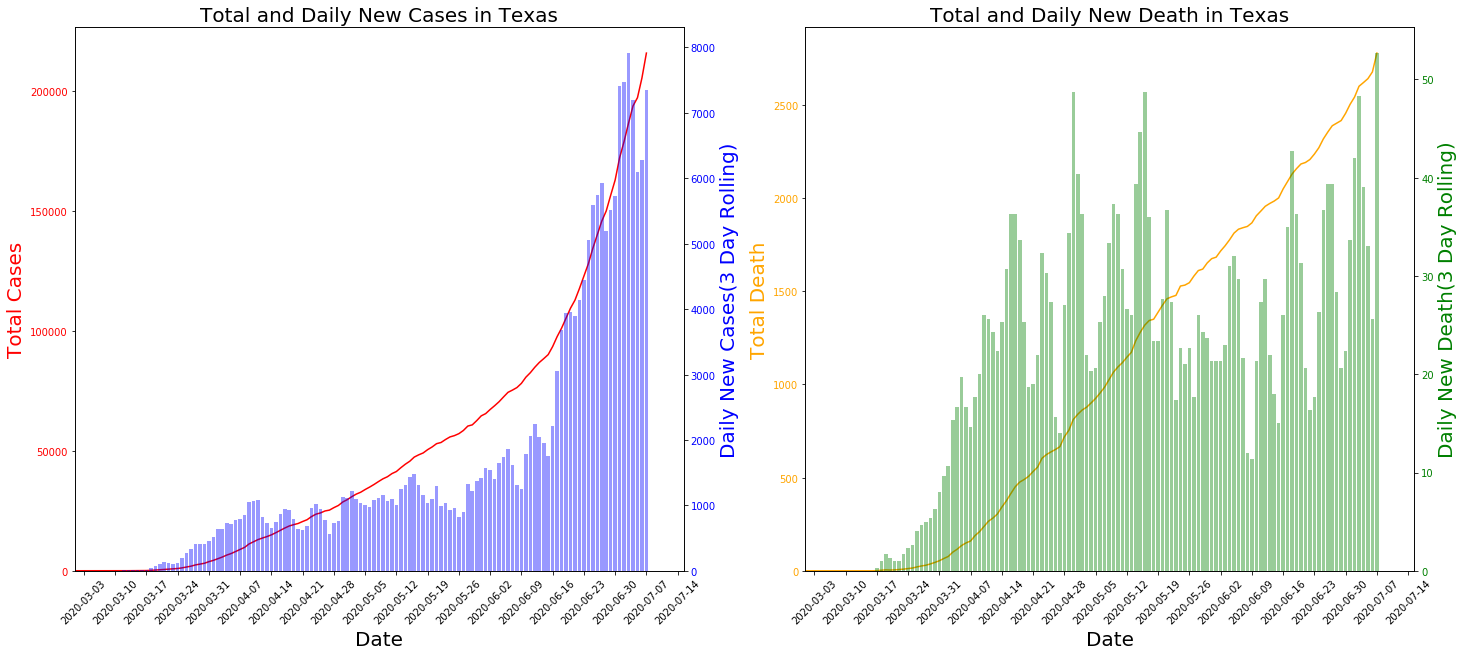

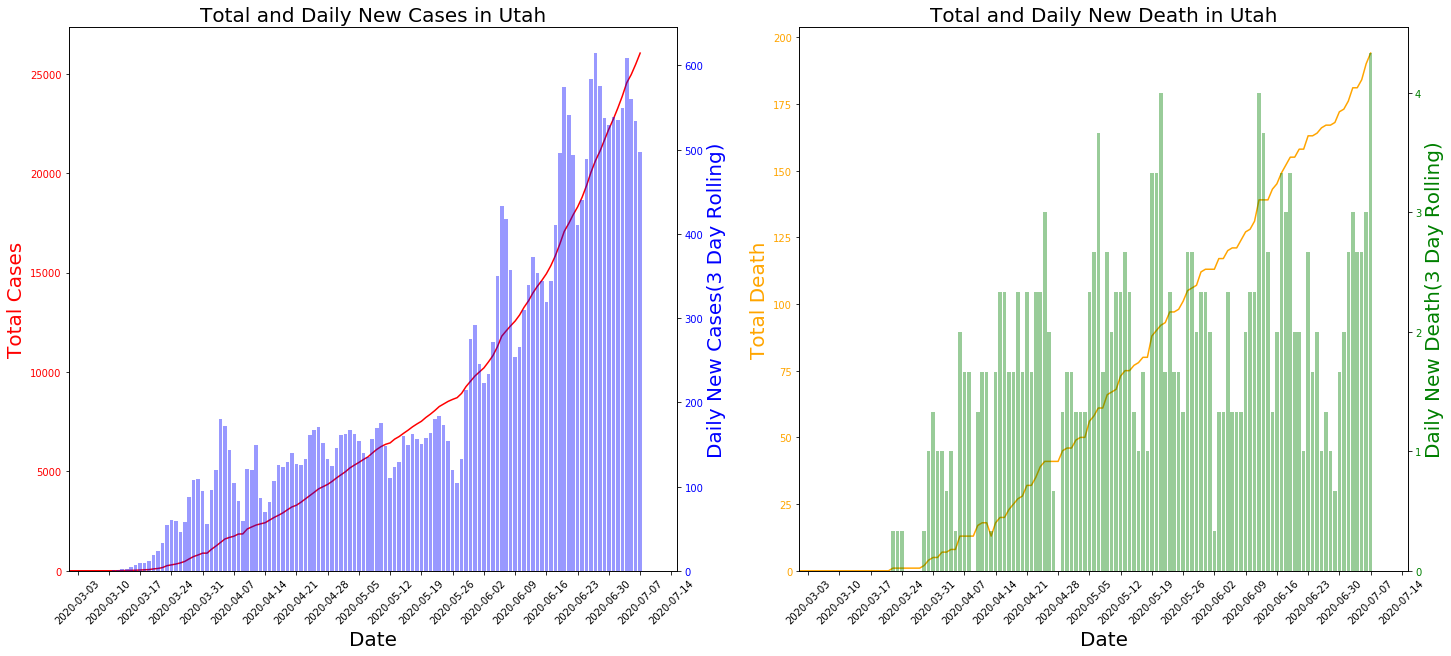

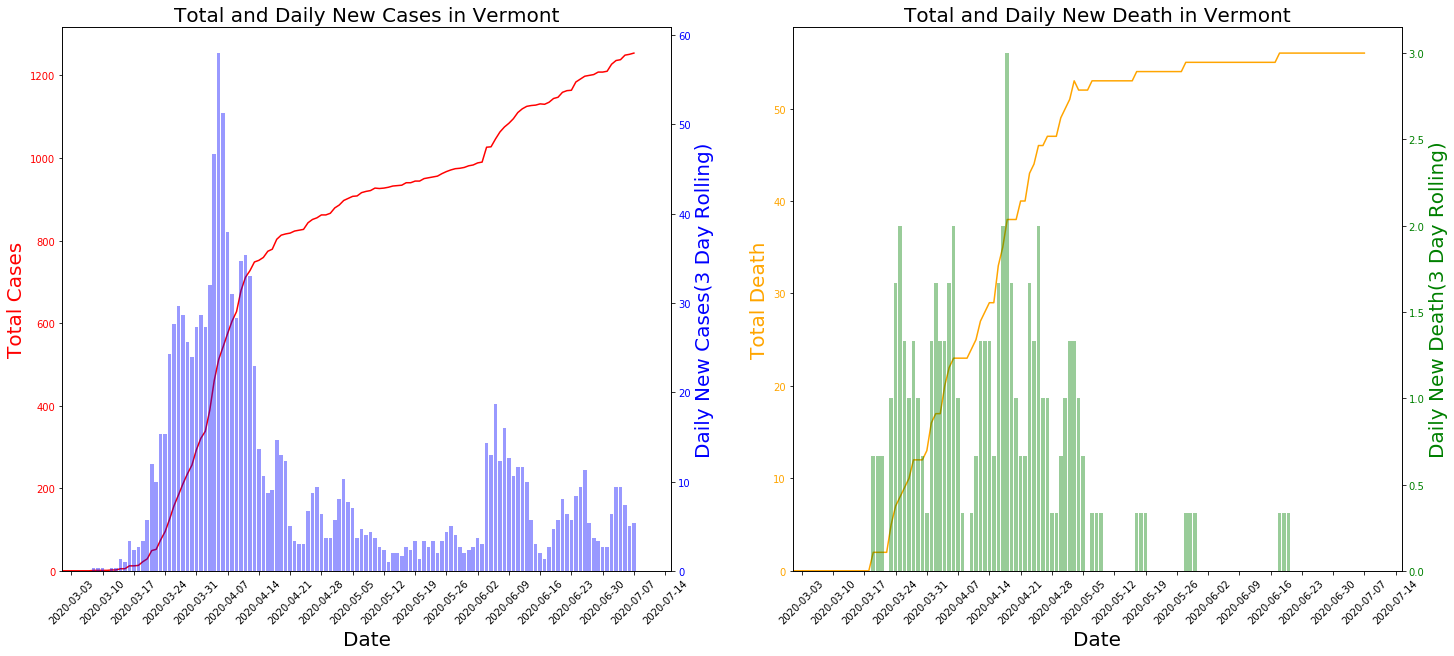

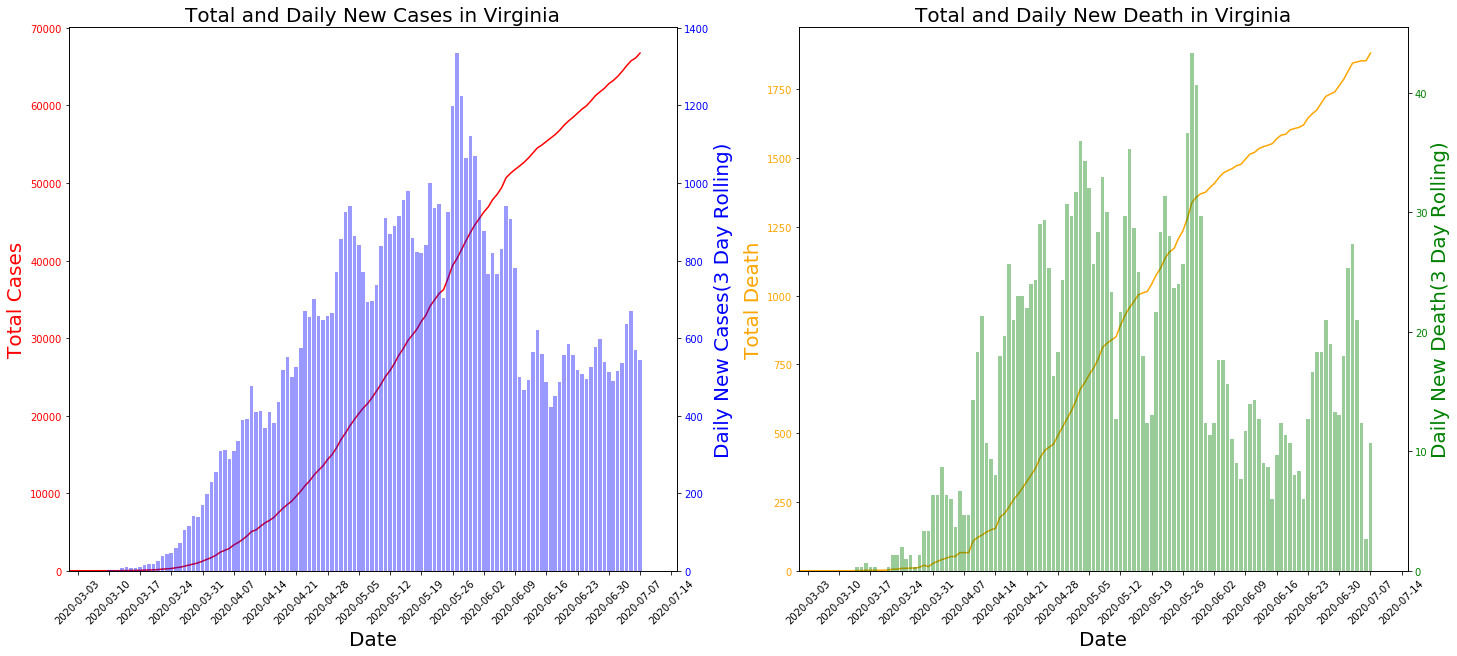

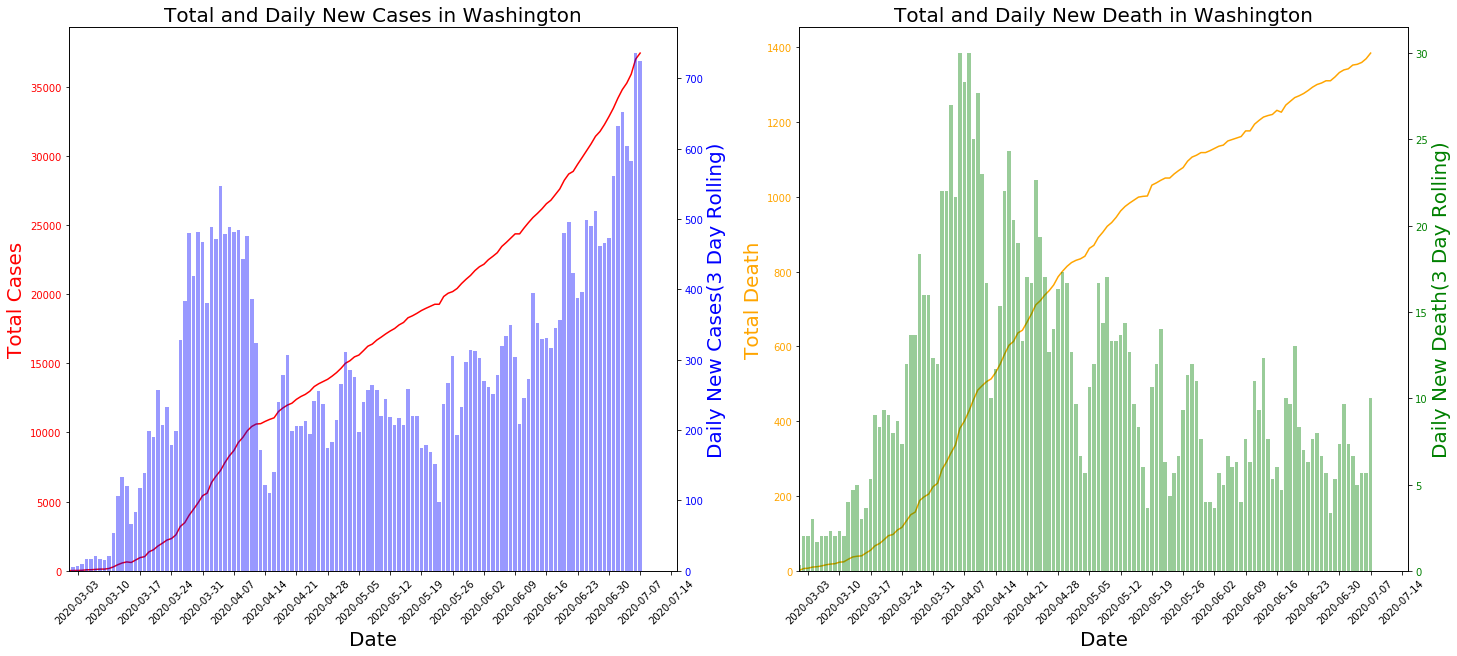

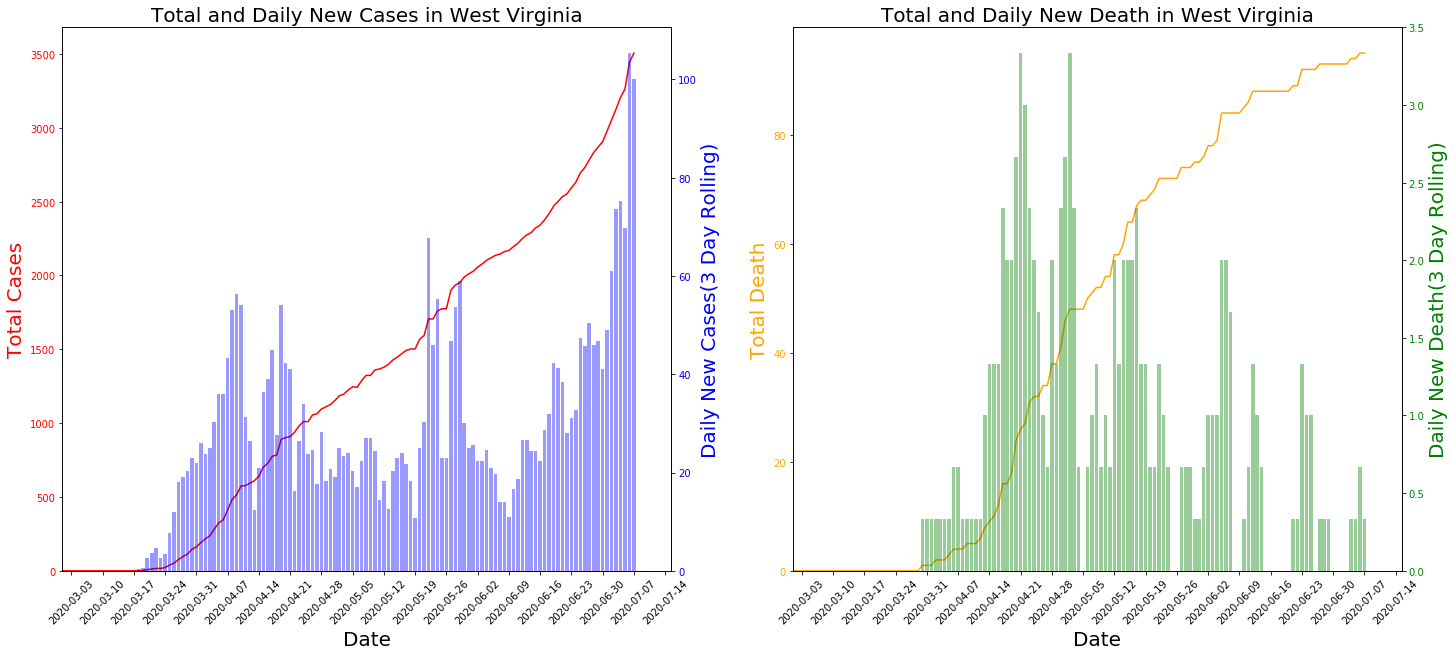

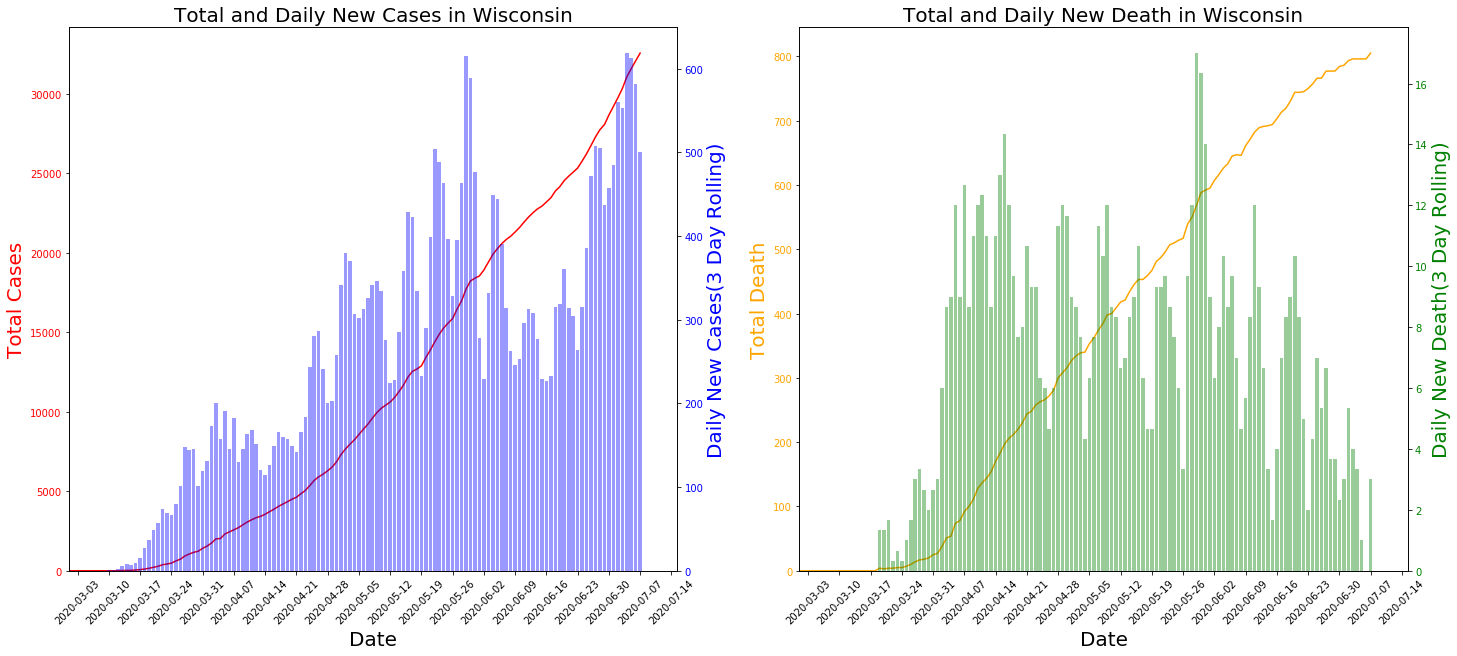

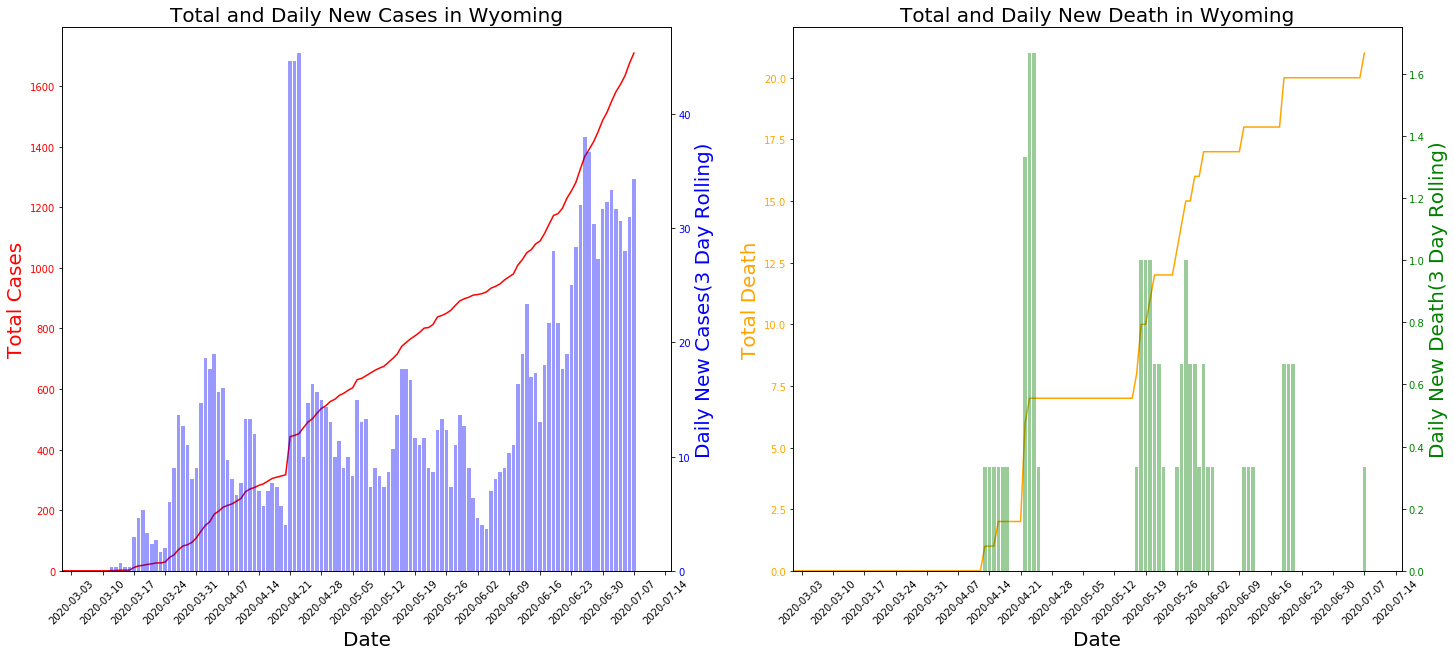

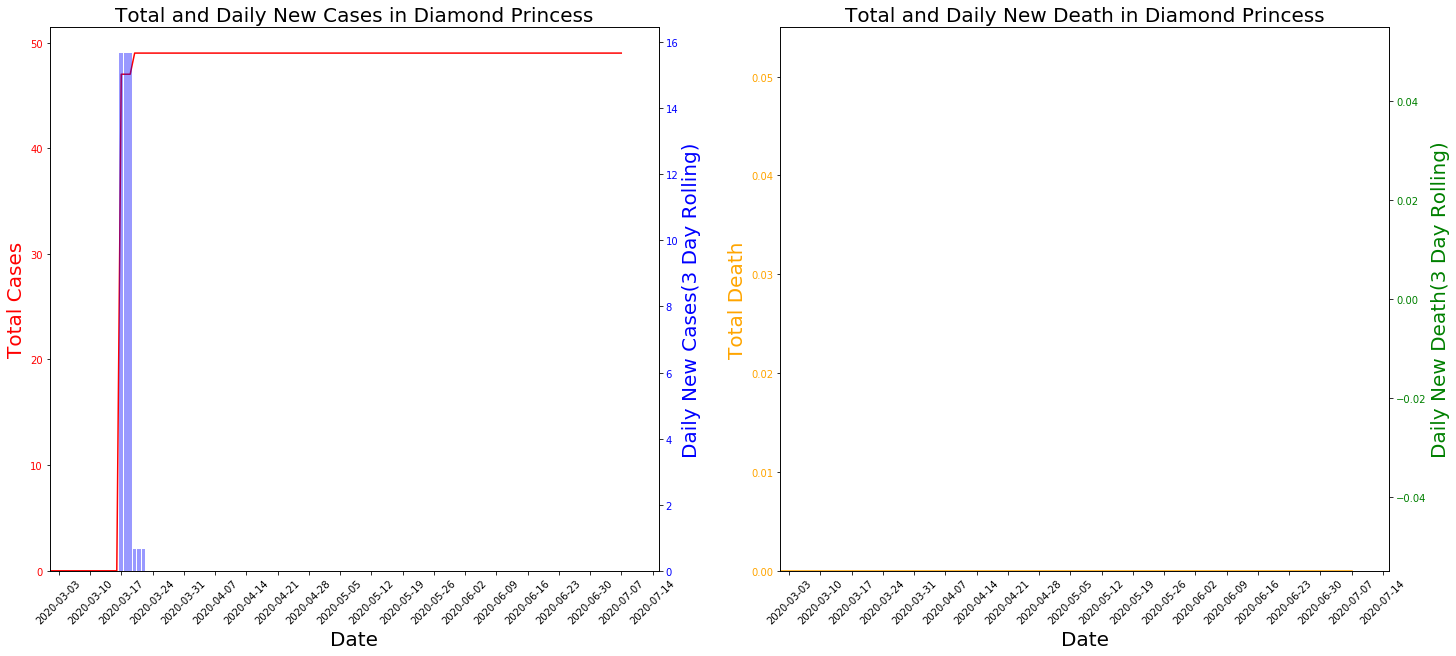

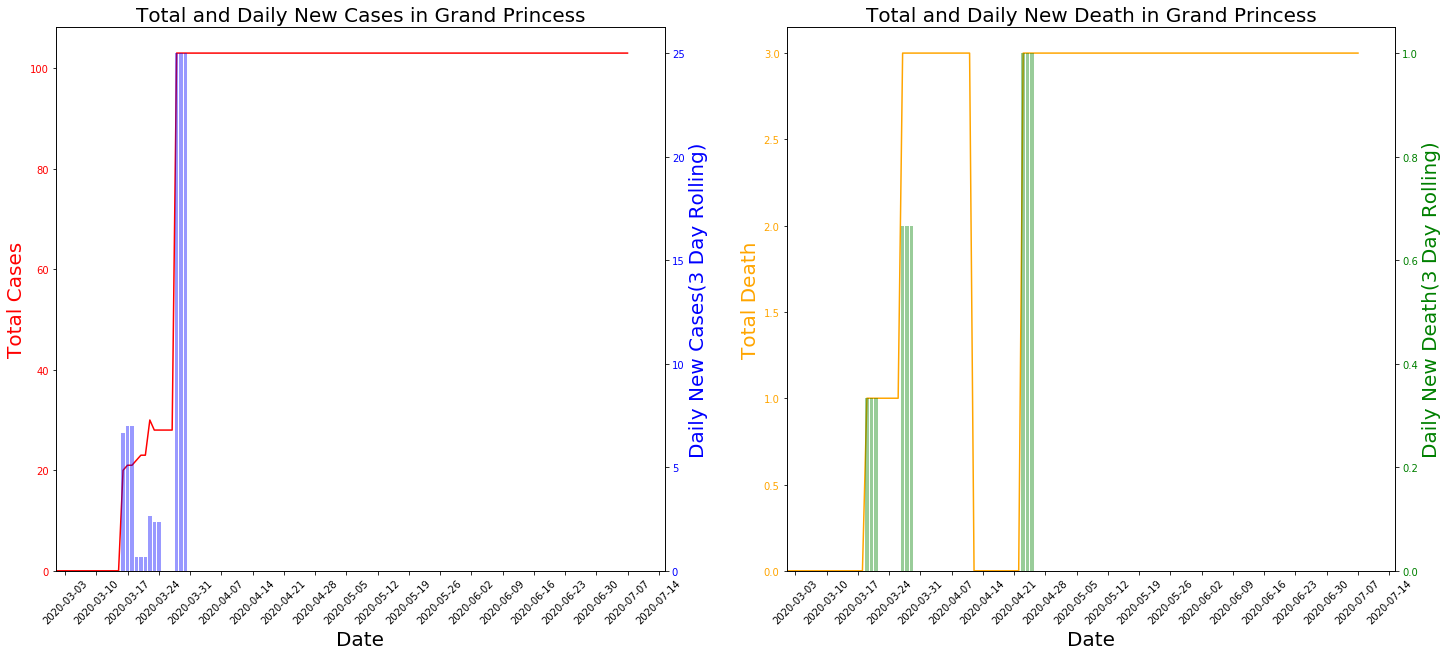

In [8]:
data = {}

for state in states:
    
    ### New cases
    state_new = confirmed_clean.loc[confirmed_clean['Province_State'] == state]
    state_new_agg = state_new.groupby('Date')[['Total Cases']].sum().reset_index()
    state_new_agg['New Cases'] = [state_new_agg['Total Cases'][0]] + \
                 [y-x if y>x else 0 for x,y in zip(state_new_agg['Total Cases'][:-1],state_new_agg['Total Cases'][1:])]
    state_new_agg.set_index('Date',inplace = True)
    
    ### Death
    state_death = death_clean.loc[death_clean['Province_State']== state]
    state_death_agg = state_death.groupby('Date')[['Total Death']].sum().reset_index()
    state_death_agg['New Death'] =[state_death_agg['Total Death'][0]]+ \
                   [y-x if y>x else 0 for x,y in zip(state_death_agg['Total Death'][:-1],state_death_agg['Total Death'][1:])]
    state_death_agg.set_index('Date',inplace = True)
    
    data['%s' % state] = state_new_agg.merge(state_death_agg, left_index = True, right_index = True)
    data['%s' % state]['State'] = state
    data['%s' % state].reset_index(inplace = True)

    ### Plot
    
    fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(24,10))
    ax2 = axs[0].twinx()
    ax3 = axs[1].twinx()
    axs[0].plot(data['%s' % state]['Date'], data['%s' % state]['Total Cases'], 'r-')
    axs[0].tick_params(axis = 'y', labelcolor='r')
    axs[0].tick_params(axis = 'x', labelrotation = 45)
    axs[0].set_xlim(datetime.date(2020, 3, 1))
    axs[0].set_ylim(0)
    axs[0].set_xlabel('Date',fontsize = 20)
    axs[0].set_ylabel('Total Cases', color='r',fontsize = 20)
    new_3d_rolling = data['%s' % state]['New Cases'].rolling(3).mean().fillna(0)
    ax2.bar(data['%s' % state]['Date'],new_3d_rolling, color = 'b', alpha= 0.4)
    ax2.tick_params(axis = 'y',labelcolor='b')
    ax2.set_ylabel('Daily New Cases(3 Day Rolling)', color='b',fontsize = 20)
    
    axs[0].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[0].set_title('Total and Daily New Cases in %s' %state,fontsize = 20)

    
    axs[1].plot(data['%s' % state]['Date'], data['%s' % state]['Total Death'], '-',color = 'orange')
    axs[1].tick_params(axis = 'y', labelcolor='orange')
    axs[1].tick_params(axis = 'x', labelrotation = 45)
    axs[1].set_xlim(datetime.date(2020, 3, 1))
    axs[1].set_ylim(0)
    axs[1].set_xlabel('Date',fontsize = 20)
    axs[1].set_ylabel('Total Death', color='orange',fontsize = 20)
    death_3d_rolling = data['%s' % state]['New Death'].rolling(3).mean().fillna(0)
    ax3.bar(data['%s' % state]['Date'], death_3d_rolling, color = 'green', alpha= 0.4)
    ax3.tick_params(axis = 'y',labelcolor='green')
    ax3.set_ylabel('Daily New Death(3 Day Rolling)', color='green',fontsize = 20)
    
    axs[1].xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
    axs[1].set_title('Total and Daily New Death in %s' %state,fontsize = 20)
    plt.show();